In [1]:
# Import libraries
import pandas as pd
from pandas import ExcelWriter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline


UsageError: Line magic function `%` not found.


In [2]:
###Import enrollment files
##1. Find file in finder
##2. Option + Command + C
##3. Paste Info read_csv(r” ”)


enroll_1213 = pd.read_csv(r"/Users/holly/Desktop/nycdoe/SPOP Enrollment Files/2012-13_enroll.csv")
enroll_1314 = pd.read_csv(r"/Users/holly/Desktop/nycdoe/SPOP Enrollment Files/2013-14_enroll.csv")
enroll_1415 = pd.read_csv(r"/Users/holly/Desktop/nycdoe/SPOP Enrollment Files/2014-15_enroll.csv")
enroll_1516 = pd.read_csv(r"/Users/holly/Desktop/nycdoe/SPOP Enrollment Files/2015-16_enroll.csv")
enroll_1617 = pd.read_csv(r"/Users/holly/Desktop/nycdoe/SPOP Enrollment Files/2016-17_enroll.csv") 
enroll_1718 = pd.read_csv(r"/Users/holly/Desktop/nycdoe/SPOP Enrollment Files/2017-18_enroll.csv")  
enroll_1819 = pd.read_csv(r"/Users/holly/Desktop/nycdoe/SPOP Enrollment Files/2018-19_enroll.csv")
enroll_1920 = pd.read_csv(r"/Users/holly/Desktop/nycdoe/SPOP Enrollment Files/2019-20_enroll.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#https://thispointer.com/python-pandas-how-to-add-new-columns-in-a-dataframe-using-or-dataframe-assign/
#df_obj['Total'] = 50
enroll_1213['year'] = '2012-2013'
enroll_1314['year'] = '2013-2014'
enroll_1415['year'] = '2014-2015'
enroll_1516['year'] = '2015-2016'
enroll_1617['year'] = '2016-2017'
enroll_1718['year'] = '2017-2018'
enroll_1819['year'] = '2018-2019'
enroll_1920['year'] = '2019-2020'

In [4]:
#new_rows = df1.append(df2)
enroll_1214 = enroll_1213.append(enroll_1314)
enroll_1215 = enroll_1214.append(enroll_1415)
enroll_1216 = enroll_1215.append(enroll_1516)
enroll_1217 = enroll_1216.append(enroll_1617)
enroll_1218 = enroll_1217.append(enroll_1718)
enroll_1219 = enroll_1218.append(enroll_1819)
enroll_final = enroll_1219.append(enroll_1920)

In [5]:
enroll_final.shape

(8388600, 39)

In [6]:
#Source: https://thispointer.com/python-pandas-how-to-add-new-columns-in-a-dataframe-using-or-dataframe-assign/
#Source: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
#df_obj['Percentage'] = (df_obj['Marks'] / df_obj['Total']) * 100

#enroll_1213['grade_cat'] = (enroll_1213['grade_level'])

def grade_cat (row):
    if row['grade_level'] == "K":
      return 'K-2'
    if row['grade_level'] == "1":
      return 'K-2'
    if row['grade_level'] == "2":
      return 'K-2'
    if row['grade_level'] == "3":
      return '3-5'
    if row['grade_level'] == "4":
      return '3-5'
    if row['grade_level'] == "5":
      return '3-5'
    if row['grade_level'] == "6":
      return 'MS'
    if row['grade_level'] == "7":
      return 'MS'
    if row['grade_level'] == "8":
      return 'MS'
    if row['grade_level'] == "9":
      return 'HS'
    if row['grade_level'] == "10":
      return 'HS'
    if row['grade_level'] == "11":
      return 'HS'
    if row['grade_level'] == "12":
      return 'HS'
    return 'Other'



In [7]:
#enroll_1213.apply (lambda row: grade_cat(row), axis=1)
enroll_final.apply (lambda row: grade_cat(row), axis=1)

0           HS
1           HS
2           HS
3           HS
4           HS
          ... 
1048570     MS
1048571    3-5
1048572     MS
1048573     MS
1048574     MS
Length: 8388600, dtype: object

In [8]:
enroll_final['grade_cat'] = enroll_final.apply (lambda row: grade_cat(row), axis=1)

In [10]:
def swd_flg (row):
    if row['iep_spec_ed_flg'] == "Y":
      return 'Y'
    if row['iep_spec_ed_flg'] == "P":
      return 'Y'
    return 'N'

In [11]:
enroll_final.apply (lambda row: swd_flg(row), axis=1)

0          N
1          N
2          Y
3          N
4          Y
          ..
1048570    N
1048571    N
1048572    N
1048573    N
1048574    N
Length: 8388600, dtype: object

In [12]:
enroll_final['swd_flg'] = enroll_final.apply (lambda row: swd_flg(row), axis=1)

In [345]:
#enroll_1213.shape, enroll_1314.shape, enroll_1415.shape, enroll_1516.shape, enroll_1617.shape, enroll_1718.shape, enroll_1819.shape, enroll_1920.shape

In [13]:
enroll_final.head()

,dbn,student_id,dob,sex,ethnicity,poverty,admit_date,home_lang,grade_level,iep_spec_ed_flg,...,other,white,swd,ell,frl,district,borough,year,grade_cat,swd_flg
0,26Q495,200000024,19941228,F,Asian,1,20110702,MN,12,NaN,...,0,0,0,0,1,26,Queens,2012-2013,HS,N
1,01M515,200000107,19950207,F,Hispanic,1,20121010,SP,11,NaN,...,0,0,0,0,1,1,Manhattan,2012-2013,HS,N
2,02M305,200000123,19950818,F,Hispanic,1,20110702,SP,10,Y,...,0,0,1,1,1,2,Manhattan,2012-2013,HS,Y
3,01M450,200000156,19961018,F,Hispanic,1,20110702,SP,10,NaN,...,0,0,0,0,1,1,Manhattan,2012-2013,HS,N
4,01M450,200000180,19960522,M,Hispanic,1,20110702,NO,10,Y,...,0,0,1,0,1,1,Manhattan,2012-2013,HS,Y


In [349]:
#Source: https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string
#df.column1 = df.column1.fillna('')
#enroll_final['swd_flg']=enroll_final.iep_spec_ed_flg.fillna('N')

In [14]:
#Source: https://stackoverflow.com/questions/39291499/how-to-concatenate-multiple-column-values-into-a-single-column-in-panda-datafram
#df['combined']=df['bar'].astype(str)+'_'+df['foo']+'_'+df['new']
enroll_final['ethnicity_swd_flg']=enroll_final['ethnicity'].astype(str)+'_'+enroll_final['swd_flg'].astype(str)
enroll_final['ethnicity_swd_flg_sex']=enroll_final['ethnicity'].astype(str)+'_'+enroll_final['swd_flg'].astype(str)+'_'+enroll_final['sex'].astype(str)

enroll_final['ethnicity_swd_flg_sex_grade_cat']=enroll_final['ethnicity'].astype(str)+'_'+enroll_final['swd_flg'].astype(str)+'_'+enroll_final['sex'].astype(str)+'_'+enroll_final['grade_cat'].astype(str)



In [15]:
#Source: https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html
#Drop all PK students and D84/charter schools from the files (f1)

enroll_final = enroll_final.query('grade_level != "PK" & district != "84"')

In [16]:
enroll_final.shape

(7394663, 44)

In [17]:
#Source: https://stackoverflow.com/questions/27965295/dropping-rows-from-dataframe-based-on-a-not-in-condition
#df = df[~df['date'].isin(a)]

dbn_to_remove = ["75M501", "75K403", "75K503", "75M401", "75M444", "75R405", "75R505", "75Q404", "75Q504", "75X402", "75X502"]

#enroll_1213 = enroll_1213[~enroll_1213['dbn'].isin(dbn_to_remove)]
#enroll_1314 = enroll_1314[~enroll_1314['dbn'].isin(dbn_to_remove)]
#enroll_1415 = enroll_1415[~enroll_1415['dbn'].isin(dbn_to_remove)]
#enroll_1516 = enroll_1516[~enroll_1516['dbn'].isin(dbn_to_remove)]
#enroll_1617 = enroll_1617[~enroll_1617['dbn'].isin(dbn_to_remove)]
#enroll_1718 = enroll_1718[~enroll_1718['dbn'].isin(dbn_to_remove)]
#enroll_1819 = enroll_1819[~enroll_1819['dbn'].isin(dbn_to_remove)]
#enroll_1920 = enroll_1920[~enroll_1920['dbn'].isin(dbn_to_remove)]

enroll_final = enroll_final[~enroll_final['dbn'].isin(dbn_to_remove)]

In [22]:
enroll_final.head()

,dbn,student_id,dob,sex,ethnicity,poverty,admit_date,home_lang,grade_level,iep_spec_ed_flg,...,ell,frl,district,borough,year,grade_cat,swd_flg,ethnicity_swd_flg,ethnicity_swd_flg_sex,ethnicity_swd_flg_sex_grade_cat
0,26Q495,200000024,19941228,F,Asian,1,20110702,MN,12,NaN,...,0,1,26,Queens,2012-2013,HS,N,Asian_N,Asian_N_F,Asian_N_F_HS
1,01M515,200000107,19950207,F,Hispanic,1,20121010,SP,11,NaN,...,0,1,1,Manhattan,2012-2013,HS,N,Hispanic_N,Hispanic_N_F,Hispanic_N_F_HS
2,02M305,200000123,19950818,F,Hispanic,1,20110702,SP,10,Y,...,1,1,2,Manhattan,2012-2013,HS,Y,Hispanic_Y,Hispanic_Y_F,Hispanic_Y_F_HS
3,01M450,200000156,19961018,F,Hispanic,1,20110702,SP,10,NaN,...,0,1,1,Manhattan,2012-2013,HS,N,Hispanic_N,Hispanic_N_F,Hispanic_N_F_HS
4,01M450,200000180,19960522,M,Hispanic,1,20110702,NO,10,Y,...,0,1,1,Manhattan,2012-2013,HS,Y,Hispanic_Y,Hispanic_Y_M,Hispanic_Y_M_HS


In [18]:
enroll_final.shape

(7390281, 44)

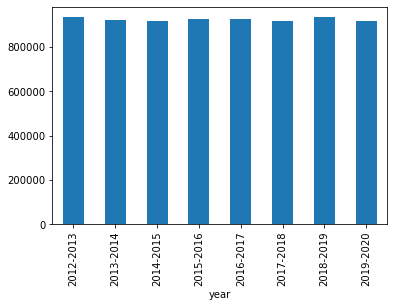

In [358]:
enroll_final.groupby('year').total.sum().plot(kind='bar');

<AxesSubplot:title={'center':'Title'}, xlabel='year,ethnicity'>

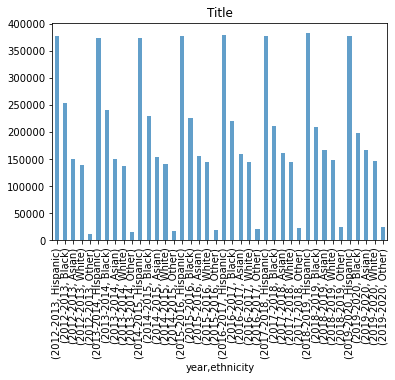

In [281]:
enroll_final.groupby('year')['ethnicity'].value_counts().plot(kind='bar', title='Title', alpha=.7 )

In [282]:
#enroll_final.plot(x = 'black', y='swd', kind='scatter');

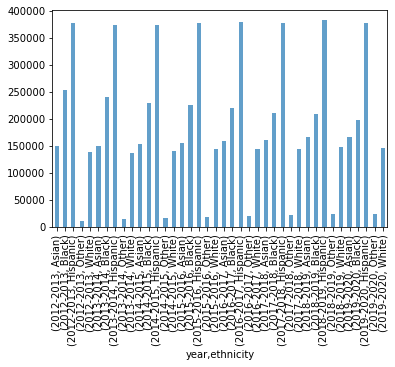

In [283]:
enroll_final.groupby(['year', 'ethnicity']).total.sum().plot(kind='bar', alpha=0.7);

In [126]:
total_enroll = enroll_final.groupby(['year']).year.count()
total_enroll

year
2012-2013    934824
2013-2014    922111
2014-2015    916840
2015-2016    924770
2016-2017    924782
2017-2018    918866
2018-2019    933150
2019-2020    914938
Name: year, dtype: int64

In [200]:
race_enroll = enroll_final.groupby(['year', 'ethnicity']).ethnicity.count()
race_enroll

year       ethnicity
2012-2013  Asian        150240
           Black        254570
           Hispanic     378530
           Other         12021
           White        139463
2013-2014  Asian        150867
           Black        241826
           Hispanic     375256
           Other         15660
           White        138502
2014-2015  Asian        154602
           Black        229781
           Hispanic     374413
           Other         16750
           White        141294
2015-2016  Asian        156829
           Black        225563
           Hispanic     378836
           Other         19192
           White        144350
2016-2017  Asian        158962
           Black        220052
           Hispanic     379771
           Other         20675
           White        145322
2017-2018  Asian        161599
           Black        211884
           Hispanic     377441
           Other         22240
           White        145702
2018-2019  Asian        167021
           Black  

In [26]:
race_percents = (race_enroll/total_enroll)*100
race_percents

year       ethnicity
2012-2013  Asian        16.071474
           Black        27.231864
           Hispanic     40.492114
           Other         1.285911
           White        14.918637
2013-2014  Asian        16.361045
           Black        26.225259
           Hispanic     40.695318
           Other         1.698277
           White        15.020101
2014-2015  Asian        16.862484
           Black        25.062279
           Hispanic     40.837333
           Other         1.826927
           White        15.410977
2015-2016  Asian        16.958703
           Black        24.391254
           Hispanic     40.965429
           Other         2.075327
           White        15.609287
2016-2017  Asian        17.189132
           Black        23.795013
           Hispanic     41.066003
           Other         2.235662
           White        15.714190
2017-2018  Asian        17.586786
           Black        23.059293
           Hispanic     41.076827
           Other         2.

In [21]:
swd_flg_enroll = enroll_final.groupby(['year', 'swd_flg']).ethnicity.count()
swd_flg_enroll

year       swd_flg
2012-2013  N          765097
           Y          169727
2013-2014  N          743211
           Y          178900
2014-2015  N          738699
           Y          178141
2015-2016  N          734782
           Y          189988
2016-2017  N          728105
           Y          196677
2017-2018  N          718452
           Y          200414
2018-2019  N          733181
           Y          199969
2019-2020  N          714950
           Y          199988
Name: ethnicity, dtype: int64

In [64]:
swd_percents = (swd_flg_enroll/total_enroll)*100
swd_percents

year       swd_flg
2012-2013  N          81.843962
           Y          18.156038
2013-2014  N          80.598865
           Y          19.401135
2014-2015  N          80.570110
           Y          19.429890
2015-2016  N          79.455648
           Y          20.544352
2016-2017  N          78.732609
           Y          21.267391
2017-2018  N          78.188985
           Y          21.811015
2018-2019  N          78.570541
           Y          21.429459
2019-2020  N          78.141907
           Y          21.858093
dtype: float64

In [127]:
swd_y = enroll_final.query('swd_flg == "Y"')
swd_y_enroll = swd_y.groupby(['year', 'swd_flg']).swd_flg.count()
swd_y_enroll

year       swd_flg
2012-2013  Y          169727
2013-2014  Y          178900
2014-2015  Y          178141
2015-2016  Y          189988
2016-2017  Y          196677
2017-2018  Y          200414
2018-2019  Y          199969
2019-2020  Y          199988
Name: ethnicity, dtype: int64

In [129]:
swd_y_percents = (swd_y_enroll/total_enroll)*100
swd_y_percents

year       swd_flg
2012-2013  Y          18.156038
2013-2014  Y          19.401135
2014-2015  Y          19.429890
2015-2016  Y          20.544352
2016-2017  Y          21.267391
2017-2018  Y          21.811015
2018-2019  Y          21.429459
2019-2020  Y          21.858093
dtype: float64

In [128]:
swd_n = enroll_final.query('swd_flg == "N"')
swd_n_enroll = swd_n.groupby(['year', 'swd_flg']).swd_flg.count()
swd_n_enroll

year       swd_flg
2012-2013  N          765097
2013-2014  N          743211
2014-2015  N          738699
2015-2016  N          734782
2016-2017  N          728105
2017-2018  N          718452
2018-2019  N          733181
2019-2020  N          714950
Name: swd_flg, dtype: int64

In [130]:
swd_n_percents = (swd_n_enroll/total_enroll)*100
swd_n_percents

year       swd_flg
2012-2013  N          81.843962
2013-2014  N          80.598865
2014-2015  N          80.570110
2015-2016  N          79.455648
2016-2017  N          78.732609
2017-2018  N          78.188985
2018-2019  N          78.570541
2019-2020  N          78.141907
dtype: float64

In [23]:
race_swd_flg_enroll = enroll_final.groupby(['year', 'ethnicity_swd_flg']).ethnicity.count()
race_swd_flg_enroll

year       ethnicity_swd_flg
2012-2013  Asian_N              139277
           Asian_Y               10963
           Black_N              201065
           Black_Y               53505
           Hispanic_N           298299
                                 ...  
2019-2020  Hispanic_Y            98768
           Other_N               21078
           Other_Y                4346
           White_N              120731
           White_Y               27001
Name: ethnicity, Length: 80, dtype: int64

In [24]:
race_swd_flg_sex_enroll = enroll_final.groupby(['year', 'ethnicity_swd_flg_sex']).ethnicity.count()
race_swd_flg_sex_enroll

year       ethnicity_swd_flg_sex
2012-2013  Asian_N_F                 68748
           Asian_N_M                 70529
           Asian_Y_F                  3391
           Asian_Y_M                  7572
           Black_N_F                106619
                                     ...  
2019-2020  Other_Y_M                  2870
           White_N_F                 61940
           White_N_M                 58791
           White_Y_F                  8806
           White_Y_M                 18195
Name: ethnicity, Length: 167, dtype: int64

In [25]:
race_swd_flg_sex_grade_cat_enroll = enroll_final.groupby(['year', 'ethnicity_swd_flg_sex_grade_cat']).ethnicity.count()
race_swd_flg_sex_grade_cat_enroll

year       ethnicity_swd_flg_sex_grade_cat
2012-2013  Asian_N_F_3-5                      16010
           Asian_N_F_HS                       16435
           Asian_N_F_K-2                      11198
           Asian_N_F_MS                       15279
           Asian_N_F_Other                     9826
                                              ...  
2019-2020  White_Y_M_3-5                       4751
           White_Y_M_HS                        4684
           White_Y_M_K-2                       3189
           White_Y_M_MS                        3945
           White_Y_M_Other                     1626
Name: ethnicity, Length: 807, dtype: int64

In [27]:
#counts = enroll_final.groupby(['year', 'ethnicity']).ethnicity.count()
#totals = enroll_final.groupby(['year']).borough.count()
#race_enroll_percents = (counts/totals) * 100
#race_enroll_percents

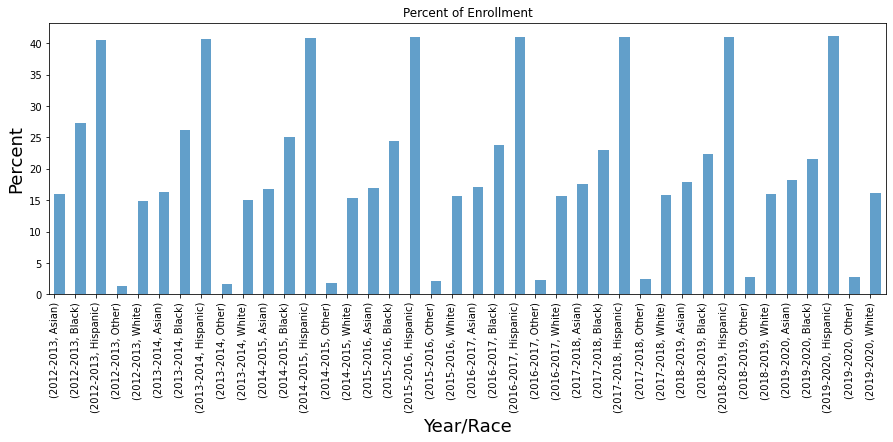

In [29]:
#Source: https://pythonbasics.org/matplotlib-bar-chart/
#Source: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
#Source: https://stackoverflow.com/questions/40575067/matplotlib-bar-chart-space-out-bars/40575741
race_percents.plot(kind='bar', title='Percent of Enrollment', alpha=0.7, figsize=(15, 5), align='edge', width=0.5)
plt.xlabel("Year/Race", fontsize=18)
plt.ylabel("Percent", fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [286]:
counts = enroll_final.groupby(['year', 'swd']).borough.count()
totals = enroll_final.groupby(['year']).borough.count()
swd_enroll_percents = (counts/totals) * 100
swd_enroll_percents

year       swd
2012-2013  0      81.887821
           1      18.112179
2013-2014  0      80.635412
           1      19.364588
2014-2015  0      80.602722
           1      19.397278
2015-2016  0      79.484412
           1      20.515588
2016-2017  0      78.732609
           1      21.267391
2017-2018  0      78.188985
           1      21.811015
2018-2019  0      78.570541
           1      21.429459
2019-2020  0      78.141907
           1      21.858093
Name: borough, dtype: float64

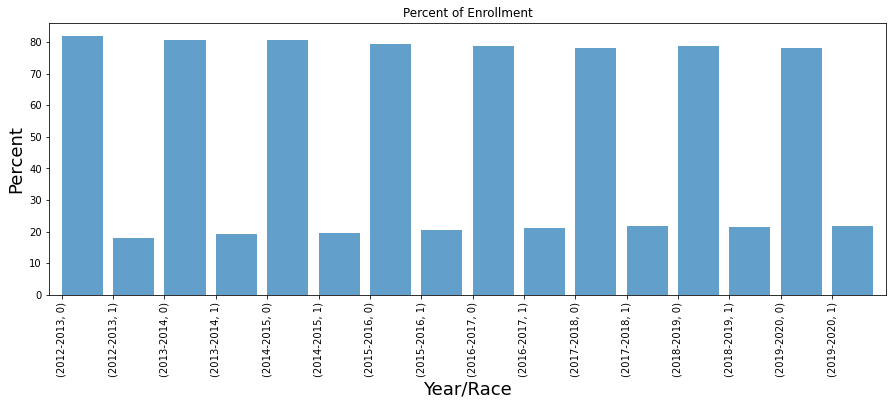

In [287]:
swd_enroll_percents.plot(kind='bar', title='Percent of Enrollment', alpha=0.7, figsize=(15, 5), align='edge', width=0.8)
plt.xlabel("Year/Race", fontsize=18)
plt.ylabel("Percent", fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [288]:
counts = enroll_final.groupby(['year', 'ethnicity', 'swd']).ethnicity.count()
totals = enroll_final.groupby(['year']).borough.count()
race_swd_enroll_percents = (counts/totals) * 100
race_swd_enroll_percents

year       ethnicity  swd
2012-2013  Asian      0      14.906121
                      1       1.165353
           Black      0      21.515815
                      1       5.716049
           Hispanic   0      31.932963
                               ...    
2019-2020  Hispanic   1      10.795048
           Other      0       2.303763
                      1       0.475005
           White      0      13.195539
                      1       2.951129
Length: 80, dtype: float64

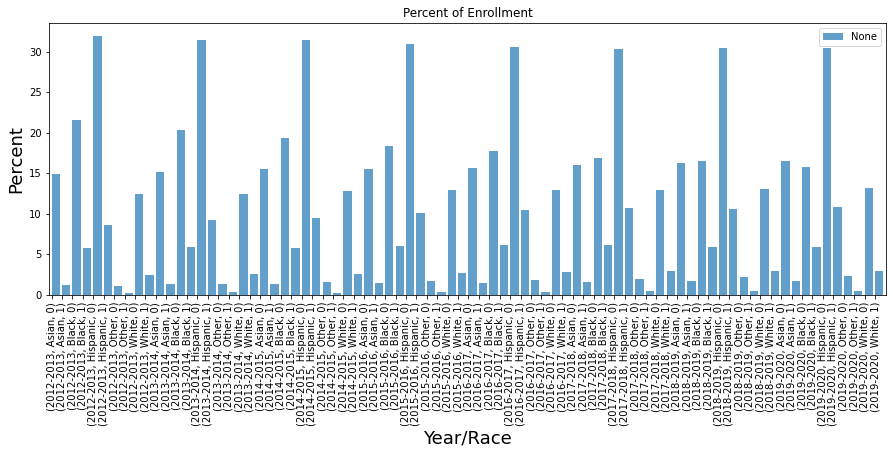

In [289]:
race_swd_enroll_percents.plot(kind='bar', title='Percent of Enrollment', alpha=0.7, figsize=(15, 5), align='edge', width=0.8)
plt.xlabel("Year/Race", fontsize=18)
plt.ylabel("Percent", fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [290]:
#enroll_final.SibSp[survived].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='survived')
#df.SibSp[died].value_counts().plot(kind='bar', alpha=0.5, color='orange', label='died')
#Plt.legend();


In [194]:
#Pivot enroll data to get summary
enroll_pivot = pd.DataFrame(enroll_final, columns= ['borough','year','ethnicity', 'sex', 'swd', 'grade_cat', 'total'])


In [220]:
#Create aggregated data file to export to excel
enroll_rawdata = enroll_pivot.pivot_table(index=['year','borough','ethnicity', 'sex', 'swd', 'grade_cat'], columns=['year'], values=['total'], aggfunc='sum', fill_value=0)
enroll_rawdata

total            \
year                                                2012-2013 2013-2014   
year      borough       ethnicity sex swd grade_cat                       
2012-2013 Bronx         Asian     F   0   3-5             919         0   
                                          HS             1030         0   
                                          K-2             627         0   
                                          MS              878         0   
                                          Other           570         0   
...                                                       ...       ...   
2019-2020 Staten Island White     M   1   3-5               0         0   
                                          HS                0         0   
                                          K-2               0         0   
                                          MS                0         0   
                                          Other             0         0   

                                                                         \
year                                                2014-2015 2015-2016   
year      borough       ethnicity sex swd grade_cat                       
2012-2013 Bronx         Asian     F   0   3-5               0         0   
                                          HS                0         0   
                                          K-2               0         0   
                                          MS                0         0   
                                          Other             0         0   
...                                                       ...       ...   
2019-2020 Staten Island White     M   1   3-5               0         0   
                                          HS                0         0   
                                          K-2               0         0   
                                          MS                0         0   
                                          Other             0         0   

                                                                         \
year                                                2016-2017 2017-2018   
year      borough       ethnicity sex swd grade_cat                       
2012-2013 Bronx         Asian     F   0   3-5               0         0   
                                          HS                0         0   
                                          K-2               0         0   
                                          MS                0         0   
                                          Other             0         0   
...                                                       ...       ...   
2019-2020 Staten Island White     M   1   3-5               0         0   
                                          HS                0         0   
                                          K-2               0         0   
                                          MS                0         0   
                                          Other             0         0   

                                                                         
year                                                2018-2019 2019-2020  
year      borough       ethnicity sex swd grade_cat                      
2012-2013 Bronx         Asian     F   0   3-5               0         0  
                                          HS                0         0  
                                          K-2               0         0  
                                          MS                0         0  
                                          Other             0         0  
...                                                       ...       ...  
2019-2020 Staten Island White     M   1   3-5               0      1029  
                                          HS                0      1216  
                                          K-2               0       681  
               

In [196]:
#Export type pivot table to excel
enroll_rawdata.to_excel(r"/Users/holly/Desktop/12172020 Susp Dispro Enroll.xlsx", sheet_name='enroll',header=True, merge_cells=False)

In [291]:
#Pivot enroll data to get summary

enroll_total = enroll_pivot.pivot_table(index=['borough'], columns=['year'], values=['total'], aggfunc='sum', fill_value=0)
print(enroll_total)

                  total                                                    \
year          2012-2013 2013-2014 2014-2015 2015-2016 2016-2017 2017-2018   
borough                                                                     
Bronx            197109    195625    193964    193245    191577    189068   
Brooklyn         275233    270707    266553    267263    266756    264501   
Manhattan        139223    136091    135515    137743    137243    136071   
Queens           266231    263838    264432    268075    270032    269971   
Staten Island     57028     55850     56376     58444     59174     59255   

                                   
year          2018-2019 2019-2020  
borough                            
Bronx            190440    182465  
Brooklyn         268711    264514  
Manhattan        138585    137651  
Queens           275338    270545  
Staten Island     60076     59763  


In [292]:
race_enroll_pivot = enroll_pivot.pivot_table(index=['borough'], columns=['year','ethnicity'], values=['total'], aggfunc='sum', fill_value=0)
print(race_enroll_pivot)

                  total                                                  \
year          2012-2013                               2013-2014           
ethnicity         Asian   Black Hispanic Other  White     Asian   Black   
borough                                                                   
Bronx              9038   55951   122112  1886   8122      8878   54565   
Brooklyn          42938  107117    77990  2795  44393     44345  100422   
Manhattan         18774   29786    65492  2526  22645     18584   28194   
Queens            74855   53720    98426  4149  35081     74538   50996   
Staten Island      4635    7996    14510   665  29222      4522    7649   

                                     ...                                  \
year                                 ... 2018-2019                         
ethnicity     Hispanic Other  White  ...     Asian  Black Hispanic Other   
borough                              ...                                   
Bronx           1214

In [293]:
swd_enroll_pivot = enroll_pivot.pivot_table(index=['borough'], columns=['year','swd'], values=['total'], aggfunc='sum', fill_value=0)
print(swd_enroll_pivot)

                  total                                                     \
year          2012-2013        2013-2014        2014-2015        2015-2016   
swd                   0      1         0      1         0      1         0   
borough                                                                      
Bronx            155191  41918    150675  44950    149241  44723    145882   
Brooklyn         226975  48258    219759  50948    216427  50126    214259   
Manhattan        114617  24606    110238  25853    109882  25633    110094   
Queens           224902  41329    220718  43120    220866  43566    221115   
Staten Island     43822  13206     42158  13692     42582  13794     43698   

                                                                         \
year                 2016-2017        2017-2018        2018-2019          
swd                1         0      1         0      1         0      1   
borough                                                                 

In [294]:
#df.to_excel(r'Path to store the exported excel file\File Name.xlsx', sheet_name='Your sheet name', index = False)

In [295]:
race_swd_enroll_pivot = enroll_pivot.pivot_table(index=['borough'], columns=['year','ethnicity', 'swd'], values=['total'], aggfunc='sum', fill_value=0)
print(race_swd_enroll_pivot)

                  total                                                        \
year          2012-2013                                                         
ethnicity         Asian        Black        Hispanic        Other       White   
swd                   0     1      0      1        0      1     0    1      0   
borough                                                                         
Bronx              8402   636  43508  12443    94959  27153  1527  359   6795   
Brooklyn          39982  2956  86112  21005    60747  17243  2345  450  37789   
Manhattan         17359  1415  23106   6680    52163  13329  2132  394  19857   
Queens            69315  5540  42802  10918    80148  18278  3593  556  29044   
Staten Island      4288   347   5607   2389    10500   4010   525  140  22902   

                     ...                                                      \
year                 ... 2019-2020                                             
ethnicity            ...     

In [296]:
race_swd_gender_enroll_pivot = enroll_pivot.pivot_table(index=['borough'], columns=['year','ethnicity', 'swd', 'sex'], values=['total'], aggfunc='sum', fill_value=0)
print(race_swd_gender_enroll_pivot)

                  total                                                \
year          2012-2013                                                 
ethnicity         Asian                     Black                       
swd                   0            1            0            1          
sex                   F      M     F     M      F      M     F      M   
borough                                                                 
Bronx              4024   4378   185   451  22873  20635  3853   8590   
Brooklyn          19467  20515   941  2015  45320  40792  6969  14036   
Manhattan          8872   8487   463   952  13129   9977  2349   4331   
Queens            34280  35035  1672  3868  22269  20533  3515   7403   
Staten Island      2128   2160   107   240   3057   2550   798   1591   

                               ...                                         \
year                           ... 2019-2020                                
ethnicity     Hispanic         ...  Hispan

In [298]:
########SUSP Data

In [30]:
#Import suspension data.
suspmaster = pd.ExcelFile(r"/Users/holly/Desktop/nycdoe/12152020 SUSP Dispro Data.xlsx")

In [31]:
#Read data from each tab.
#schools = suspmaster.parse('schools')
susp_1920 = suspmaster.parse('1920')
susp_1819 = suspmaster.parse('1819')
susp_1718 = suspmaster.parse('1718')
susp_1617 = suspmaster.parse('1617')
susp_1516 = suspmaster.parse('1516')
susp_1415 = suspmaster.parse('1415')
susp_1314 = suspmaster.parse('1314')
susp_1213 = suspmaster.parse('1213')

In [32]:
#enroll_1214 = enroll_1213.append(enroll_1314)

susp_1214 = susp_1213.append(susp_1314)
susp_1215 = susp_1214.append(susp_1415)
susp_1216 = susp_1215.append(susp_1516)
susp_1217 = susp_1216.append(susp_1617)
susp_1218 = susp_1217.append(susp_1718)
susp_1219 = susp_1218.append(susp_1819)
susp_final = susp_1219.append(susp_1920)

In [33]:
susp_final.shape

(312160, 19)

In [34]:
#Source: https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
susp_final = susp_final.rename(columns={'Grade': 'grade_level', 'Ethnicity': 'race', 'AcademicYear': 'year'})

In [35]:
#susp_final.head()

In [36]:
def grade_cat (row):
    if row['grade_level'] == "K":
      return 'K-2'
    if row['grade_level'] == "1":
      return 'K-2'
    if row['grade_level'] == "2":
      return 'K-2'
    if row['grade_level'] == "3":
      return '3-5'
    if row['grade_level'] == "4":
      return '3-5'
    if row['grade_level'] == "5":
      return '3-5'
    if row['grade_level'] == "6":
      return 'MS'
    if row['grade_level'] == "7":
      return 'MS'
    if row['grade_level'] == "8":
      return 'MS'
    if row['grade_level'] == "9":
      return 'HS'
    if row['grade_level'] == "10":
      return 'HS'
    if row['grade_level'] == "11":
      return 'HS'
    if row['grade_level'] == "12":
      return 'HS'
    return 'Other'

In [37]:
#susp_final.apply (lambda row: grade_cat(row), axis=1)
susp_final.apply (lambda row: grade_cat(row), axis=1)

0           HS
1           HS
2           HS
3           HS
4           HS
         ...  
18210    Other
18211    Other
18212       HS
18213       HS
18214       HS
Length: 312160, dtype: object

In [38]:
susp_final['grade_cat'] = susp_final.apply (lambda row: grade_cat(row), axis=1)

In [256]:
check = susp_final.query('grade_cat == "Other"')
check

,AcademicYear,SOHO_Case,Type,Student_ID,Suspend_Days,ControlNo,Level,Code,Short Description,DBN,...,race,Location_Category,Administrative_District,Borough,grade_cat,ethnicity,ethnicity_SWD,ethnicity_SWD_Gender,ethnicity_SWD_Gender_grade_cat,total
68,2012-2013,13-79-30394,P,270279862,5.0,79Q950-021113-0159,4,B38,Coercion/Threats,79Q950,...,Black,High school,79,Q,Other,Black,Black_N,Black_N_M,Black_N_M_Other,1
160,2012-2013,13-79-28458,S,205363237,6.0,24Q061-013013-0183,5,B55,Group Violence,79M973,...,Hispanic,Ungraded,79,M,Other,Hispanic,Hispanic_N,Hispanic_N_M,Hispanic_N_M_Other,1
162,2012-2013,13-79-65527,P,223473919,2.0,27Q223-061813-0048,3,B22,Trespassing,79M973,...,Hispanic,Ungraded,79,M,Other,Hispanic,Hispanic_N,Hispanic_N_M,Hispanic_N_M_Other,1
163,2012-2013,13-79-63499,P,203218458,3.0,79M973-060513-0059,4,B37,Altercation and/or Physically Aggressive Behavior,79M973,...,Black,Ungraded,79,M,Other,Black,Black_N,Black_N_M,Black_N_M_Other,1
164,2012-2013,13-29-18782,P,233628874,2.0,15K001-121912-0113,4,A34,Altercation and/or Physically Aggressive Behavior,15K001,...,Hispanic,Elementary,15,K,Other,Hispanic,Hispanic_N,Hispanic_N_M,Hispanic_N_M_Other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18207,2019-2020,20-40-24820,S,248849333,10.0,10X391-031020-0072,5,B58,Weapon Possession (Category I),10X391,...,Hispanic,Junior High-Intermediate-Middle,10,X,Other,Hispanic,Hispanic_N,Hispanic_N_F,Hispanic_N_F_Other,1
18208,2019-2020,20-45-25009,S,214841009,10.0,29Q238-031020-0235,5,B54,Group Violence,29Q238,...,Hispanic,Junior High-Intermediate-Middle,29,Q,Other,Hispanic,Hispanic_Y,Hispanic_Y_F,Hispanic_Y_F_Other,1
18209,2019-2020,20-40-25095,S,220723910,10.0,10X206-031120-0080,5,B52,Using Force Against/Inflicting to/Inflicting S...,10X206,...,Hispanic,Junior High-Intermediate-Middle,10,X,Other,Hispanic,Hispanic_N,Hispanic_N_F,Hispanic_N_F_Other,1
18210,2019-2020,20-40-24890,S,242291888,10.0,11X287-031120-0316,4,B45,Reckless Behavior with Substantial Risk of Ser...,11X287,...,Black,Junior High-Intermediate-Middle,11,X,Other,Black,Black_N,Black_N_F,Black_N_F_Other,1


In [39]:
def ethnicity (row):
    if row['race'] == "Black":
      return 'Black'
    if row['race'] == "Hispanic":
      return 'Hispanic'
    if row['race'] == "Asian":
      return 'Asian'
    if row['race'] == "White":
      return 'White'
    return 'Other'

In [40]:
#susp_final.apply (lambda row: grade_cat(row), axis=1)
susp_final.apply (lambda row: ethnicity(row), axis=1)

0           Black
1           Black
2        Hispanic
3        Hispanic
4        Hispanic
           ...   
18210       Black
18211    Hispanic
18212       Asian
18213       Black
18214       White
Length: 312160, dtype: object

In [41]:
susp_final['ethnicity'] = susp_final.apply (lambda row: ethnicity(row), axis=1)

In [42]:
susp_final['ethnicity_SWD']=susp_final['ethnicity'].astype(str)+'_'+susp_final['SWD'].astype(str)
susp_final['ethnicity_SWD_Gender']=susp_final['ethnicity'].astype(str)+'_'+susp_final['SWD'].astype(str)+'_'+susp_final['Gender'].astype(str)
susp_final['ethnicity_SWD_Gender_grade_cat']=susp_final['ethnicity'].astype(str)+'_'+susp_final['SWD'].astype(str)+'_'+susp_final['Gender'].astype(str)+'_'+susp_final['grade_cat'].astype(str)


In [43]:
susp_final['total'] = 1

In [44]:
susp_final.shape

(312160, 25)

In [45]:
susp_final.head()

,AcademicYear,SOHO_Case,Type,Student_ID,Suspend_Days,ControlNo,Level,Code,Short Description,DBN,...,race,Location_Category,Administrative_District,Borough,grade_cat,ethnicity,ethnicity_SWD,ethnicity_SWD_Gender,ethnicity_SWD_Gender_grade_cat,total
0,2012-2013,13-32-30669,P,268716800,4.0,17K467-021113-0006,4,B44,Taking Property Without Authorization,17K467,...,Black,High school,17,K,HS,Black,Black_N,Black_N_M,Black_N_M_HS,1
1,2012-2013,13-34-43411,S,268994399,0.0,19K501-032113-0006,4,B37,Altercation and/or Physically Aggressive Behavior,19K501,...,Black,High school,19,K,HS,Black,Black_N,Black_N_M,Black_N_M_HS,1
2,2012-2013,13-34-21302,S,268373016,5.0,19K501-010713-0004,5,B59,Weapon Possession (Category I),19K501,...,Hispanic,High school,19,K,HS,Hispanic,Hispanic_N,Hispanic_N_F,Hispanic_N_F_HS,1
3,2012-2013,13-34-43407,S,264795402,6.0,19K501-032113-0006,4,B37,Altercation and/or Physically Aggressive Behavior,19K501,...,Hispanic,High school,19,K,HS,Hispanic,Hispanic_N,Hispanic_N_M,Hispanic_N_M_HS,1
4,2012-2013,13-26-57984,S,267319853,10.0,06M457-051313-0007,4,B44,Taking Property Without Authorization,06M457,...,Hispanic,High school,6,M,HS,Hispanic,Hispanic_N,Hispanic_N_F,Hispanic_N_F_HS,1


In [48]:
susp_totals = susp_final.groupby(['AcademicYear']).AcademicYear.count()
susp_totals

AcademicYear
2012-2013    53465
2013-2014    53504
2014-2015    44626
2015-2016    37647
2016-2017    35234
2017-2018    36668
2018-2019    32801
2019-2020    18215
Name: AcademicYear, dtype: int64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

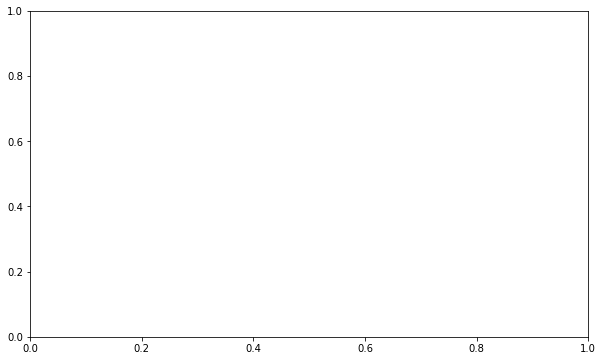

In [341]:
plt.figure(figsize=(10, 6))
ind = np.arange(len(susp_totals))  # the x locations for the groups
width = 0.25       # the width of the bars

# plot bars
susp_bars = plt.bar(ind, susp_totals, width, color='b', alpha=.7, label='Suspensions')

# title and labels
x = [0,1,2,3,4,5,6,7]
xticklabels = ['SY1213', 'SY1314', 'SY1415', 'SY1516', 'SY1617', 'SY1718', 'SY1819', 'SY1920']
plt.ylabel('Count', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.title('Suspensions', fontweight='bold')
#plt.xticks(x, xticklabels, rotation=80)

#locations = ind + width / 2  # xtick locations

# legend
plt.legend()
plt.show()

In [179]:
susp_type_totals = susp_final.groupby(['AcademicYear', 'Type']).AcademicYear.count()
susp_type_totals

AcademicYear  Type
2012-2013     P       41884
              S       11581
2013-2014     P       41990
              S       11514
2014-2015     P       33753
              S       10873
2015-2016     P       27122
              S       10525
2016-2017     P       25696
              S        9538
2017-2018     P       26578
              S       10090
2018-2019     P       23936
              S        8865
2019-2020     P       13937
              S        4278
Name: AcademicYear, dtype: int64

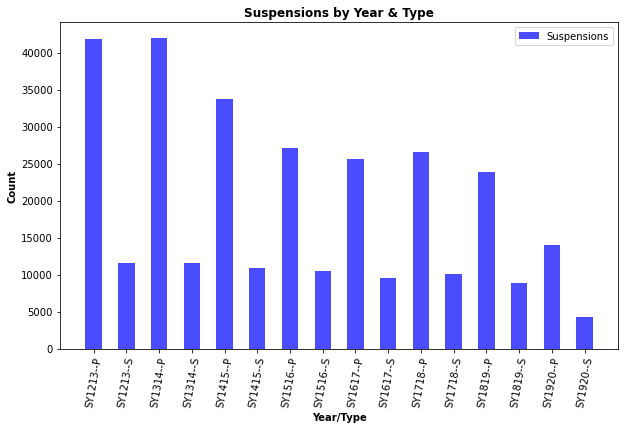

In [332]:
plt.figure(figsize=(10, 6))
ind = np.arange(len(susp_type_totals))  # the x locations for the groups
width = 0.5       # the width of the bars

# plot bars
susp_bars = plt.bar(ind, susp_type_totals, width, color='b', alpha=.7, label='Suspensions')

# title and labels
x = [0,1,2,3,4,5,6,7, 8, 9, 10,11,12,13,14,15]
xticklabels = ['SY1213--P', 'SY1213--S','SY1314--P', 'SY1314--S','SY1415--P', 'SY1415--S','SY1516--P', 'SY1516--S','SY1617--P', 'SY1617--S','SY1718--P', 'SY1718--S','SY1819--P', 'SY1819--S','SY1920--P','SY1920--S']
plt.ylabel('Count', fontweight='bold')
plt.xlabel('Year/Type', fontweight='bold')
plt.title('Suspensions by Year & Type', fontweight='bold')
plt.xticks(x, xticklabels, rotation=80)

locations = ind + width / 2  # xtick locations

# legend
plt.legend()

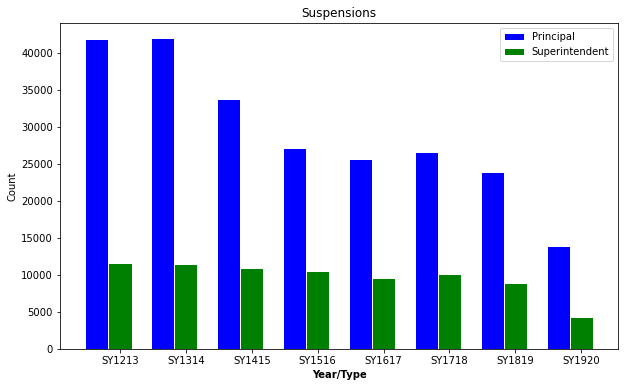

In [267]:
#Source: https://python-graph-gallery.com/11-grouped-barplot/

plt.figure(figsize=(10, 6))

# set width of bar
barWidth = 0.35
 
# set height of bar
bars1 = [41884, 41990, 33753, 27122, 25696, 26578, 23936, 13937]
bars2 = [11581, 11514, 10873, 10525, 9538, 10090, 8865, 4278]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Principal')
plt.bar(r2, bars2, color='g', width=barWidth, edgecolor='white', label='Superintendent')

 
# Add xticks on the middle of the group bars
plt.xlabel('Year/Type', fontweight='bold')
#plt.xticks(rotation=80)
plt.ylabel('Count')
plt.xticks([r + barWidth for r in range(len(bars1))], ['SY1213', 'SY1314', 'SY1415', 'SY1516', 'SY1617', 'SY1718', 'SY1819', 'SY1920'])
plt.title('Suspensions')

# Create legend & Show graphic
plt.legend()
plt.show()


In [49]:
race_susp_counts = susp_final.groupby(['AcademicYear', 'ethnicity']).ethnicity.count()
race_susp_counts

AcademicYear  ethnicity
2012-2013     Asian         1952
              Black        28230
              Hispanic     19191
              Other          485
              White         3607
2013-2014     Asian         1923
              Black        28387
              Hispanic     19141
              Other          484
              White         3569
2014-2015     Asian         1687
              Black        23068
              Hispanic     15966
              Other          599
              White         3306
2015-2016     Asian         1531
              Black        18678
              Hispanic     13869
              Other          562
              White         3007
2016-2017     Asian         1676
              Black        16529
              Hispanic     13585
              Other          578
              White         2866
2017-2018     Asian         1793
              Black        16765
              Hispanic     14448
              Other          662
              White

In [50]:
#susp_by_year = susp_final.groupby(['AcademicYear', 'ethnicity'])['total'].sum( )
#susp_totals = pd.DataFrame(susp_by_year) 

race_susp_percents = (race_susp_counts/susp_totals) * 100
race_susp_percents

AcademicYear  ethnicity
2012-2013     Asian         3.650987
              Black        52.800898
              Hispanic     35.894510
              Other         0.907136
              White         6.746470
2013-2014     Asian         3.594124
              Black        53.055846
              Hispanic     35.774895
              Other         0.904605
              White         6.670529
2014-2015     Asian         3.780307
              Black        51.691839
              Hispanic     35.777350
              Other         1.342267
              White         7.408237
2015-2016     Asian         4.066725
              Black        49.613515
              Hispanic     36.839589
              Other         1.492815
              White         7.987356
2016-2017     Asian         4.756769
              Black        46.912074
              Hispanic     38.556508
              Other         1.640461
              White         8.134189
2017-2018     Asian         4.889822
              

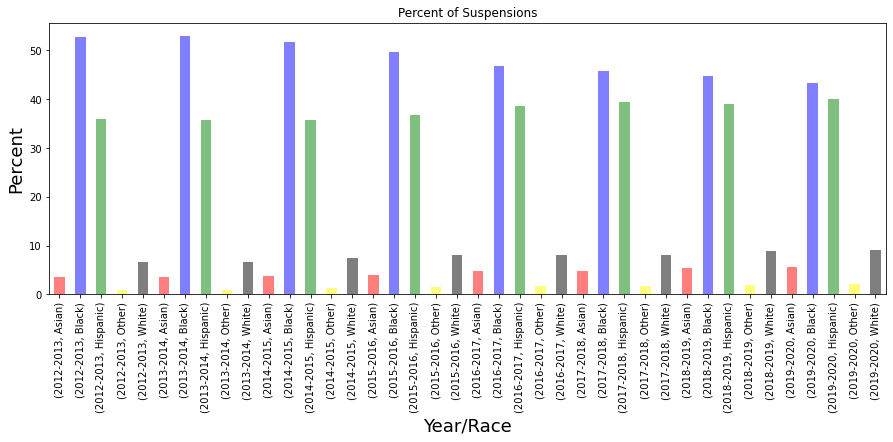

In [209]:
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]

race_susp_percents.plot(kind='bar', title='Percent of Suspensions', alpha=0.5, figsize=(15, 5), align='center', width=0.5, label='Ethnicity', color=['red', 'blue', 'green', 'yellow','black','red', 'blue', 'green', 'yellow','black','red', 'blue', 'green', 'yellow','black','red', 'blue', 'green', 'yellow','black','red', 'blue', 'green', 'yellow','black','red', 'blue', 'green', 'yellow','black','red', 'blue', 'green', 'yellow','black','red', 'blue', 'green', 'yellow','black'])

plt.xlabel("Year/Race", fontsize=18)
plt.ylabel("Percent", fontsize=18)
plt.xticks(rotation=90)
#plt.legend()
plt.show()


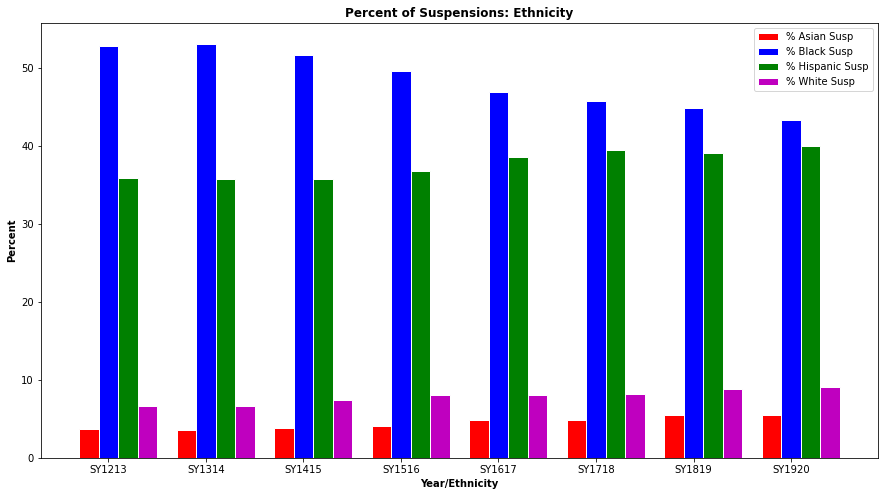

In [319]:
#Source: https://python-graph-gallery.com/11-grouped-barplot/

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
 
# set width of bar
barWidth = 0.2
 
# set height of bar
bars1 = [3.7, 3.6, 3.8, 4.1, 4.8, 4.9, 5.5, 5.5]
bars2 = [52.8, 53.1, 51.7, 49.6, 46.9, 45.7, 44.8, 43.3]
bars3 = [35.9, 35.8, 35.8, 36.8, 38.6, 39.4, 39.1, 40.0]
bars4 = [6.7, 6.7, 7.4, 8.0, 8.1, 8.2, 8.8, 9.1]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, bars1, color='r', width=barWidth, edgecolor='white', label='% Asian Susp')
plt.bar(r2, bars2, color='b', width=barWidth, edgecolor='white', label='% Black Susp')
plt.bar(r3, bars3, color='g', width=barWidth, edgecolor='white', label='% Hispanic Susp')
plt.bar(r4, bars4, color='m', width=barWidth, edgecolor='white', label='% White Susp')
 
# Add xticks on the middle of the group bars
plt.xlabel('Year/Ethnicity', fontweight='bold')
plt.ylabel('Percent', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['SY1213', 'SY1314', 'SY1415', 'SY1516', 'SY1617', 'SY1718', 'SY1819', 'SY1920'])
plt.title('Percent of Suspensions: Ethnicity', fontweight='bold') 
    
# Create legend & Show graphic
plt.legend()
plt.show()


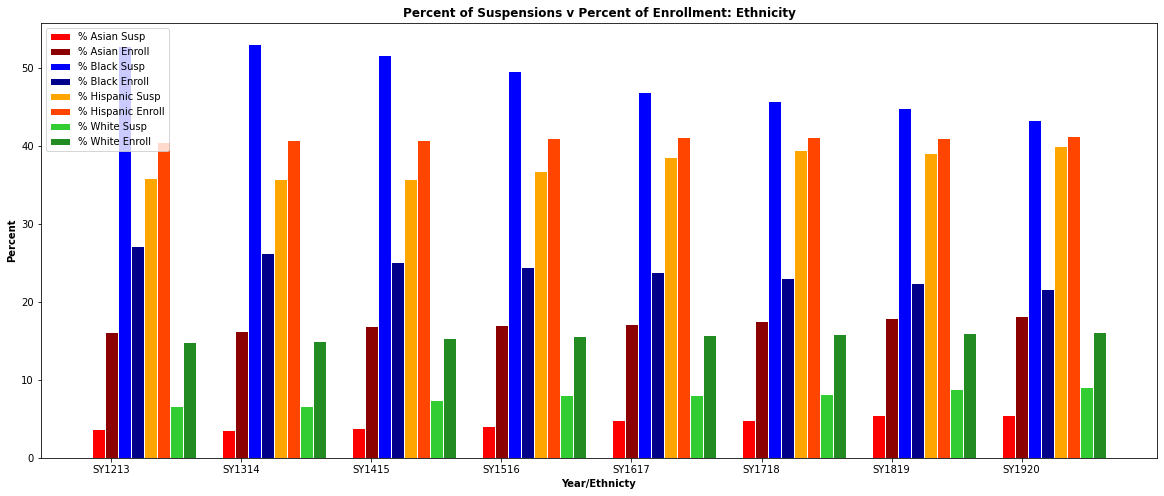

In [322]:
#Source: https://python-graph-gallery.com/11-grouped-barplot/

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
 
# set width of bar
barWidth = 0.1
 
# set height of bar
bars1 = [3.7, 3.6, 3.8, 4.1, 4.8, 4.9, 5.5, 5.5]
bars2 = [16.1, 16.2, 16.9, 17.0, 17.2, 17.6, 17.9, 18.2]
bars3 = [52.8, 53.1, 51.7, 49.6, 46.9, 45.7, 44.8, 43.3]
bars4 = [27.2, 26.2, 25.1, 24.4, 23.8, 23.1, 22.4, 21.6]
bars5 = [35.9, 35.8, 35.8, 36.8, 38.6, 39.4, 39.1, 40.0]
bars6 = [40.5, 40.7, 40.8, 41.0, 41.1, 41.1, 41.0, 41.2]
bars7 = [6.7, 6.7, 7.4, 8.0, 8.1, 8.2, 8.8, 9.1]
bars8 = [14.9, 15.0, 15.4, 15.6, 15.7, 15.9, 16.0, 16.1]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='% Asian Susp')
plt.bar(r2, bars2, color='darkred', width=barWidth, edgecolor='white', label='% Asian Enroll')
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='% Black Susp')
plt.bar(r4, bars4, color='darkblue', width=barWidth, edgecolor='white', label='% Black Enroll')
plt.bar(r5, bars5, color='orange', width=barWidth, edgecolor='white', label='% Hispanic Susp')
plt.bar(r6, bars6, color='orangered', width=barWidth, edgecolor='white', label='% Hispanic Enroll')
plt.bar(r7, bars7, color='limegreen', width=barWidth, edgecolor='white', label='% White Susp')
plt.bar(r8, bars8, color='forestgreen', width=barWidth, edgecolor='white', label='% White Enroll')
 
# Add xticks on the middle of the group bars
plt.xlabel('Year/Ethnicty', fontweight='bold')
plt.ylabel('Percent', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['SY1213', 'SY1314', 'SY1415', 'SY1516', 'SY1617', 'SY1718', 'SY1819', 'SY1920'])
plt.title('Percent of Suspensions v Percent of Enrollment: Ethnicity', fontweight='bold') 
    
# Create legend & Show graphic
plt.legend()
plt.show()

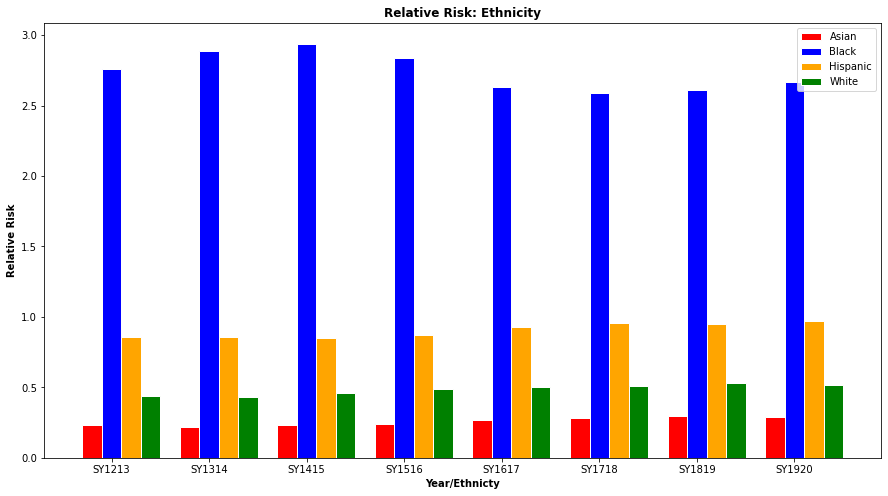

In [315]:
#Source: https://python-graph-gallery.com/11-grouped-barplot/

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
 
# set width of bar
barWidth = 0.2
 
# set height of bar
bars1 = [0.23, 0.22, 0.23, 0.24, 0.27, 0.28, 0.3, 0.29]
bars2 = [2.76, 2.89, 2.94, 2.84, 2.63, 2.59, 2.61, 2.67]
bars3 = [0.86, 0.86, 0.85, 0.87, 0.93, 0.96, 0.95, 0.97]
bars4 = [0.44, 0.43, 0.46, 0.49, 0.5, 0.51, 0.53, 0.52]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Asian')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Black')
plt.bar(r3, bars3, color='orange', width=barWidth, edgecolor='white', label='Hispanic')
plt.bar(r4, bars4, color='green', width=barWidth, edgecolor='white', label='White')
 
# Add xticks on the middle of the group bars
plt.xlabel('Year/Ethnicty', fontweight='bold')
plt.ylabel('Relative Risk', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['SY1213', 'SY1314', 'SY1415', 'SY1516', 'SY1617', 'SY1718', 'SY1819', 'SY1920'])
plt.title('Relative Risk: Ethnicity', fontweight='bold') 
    
# Create legend & Show graphic
plt.legend()
plt.show()


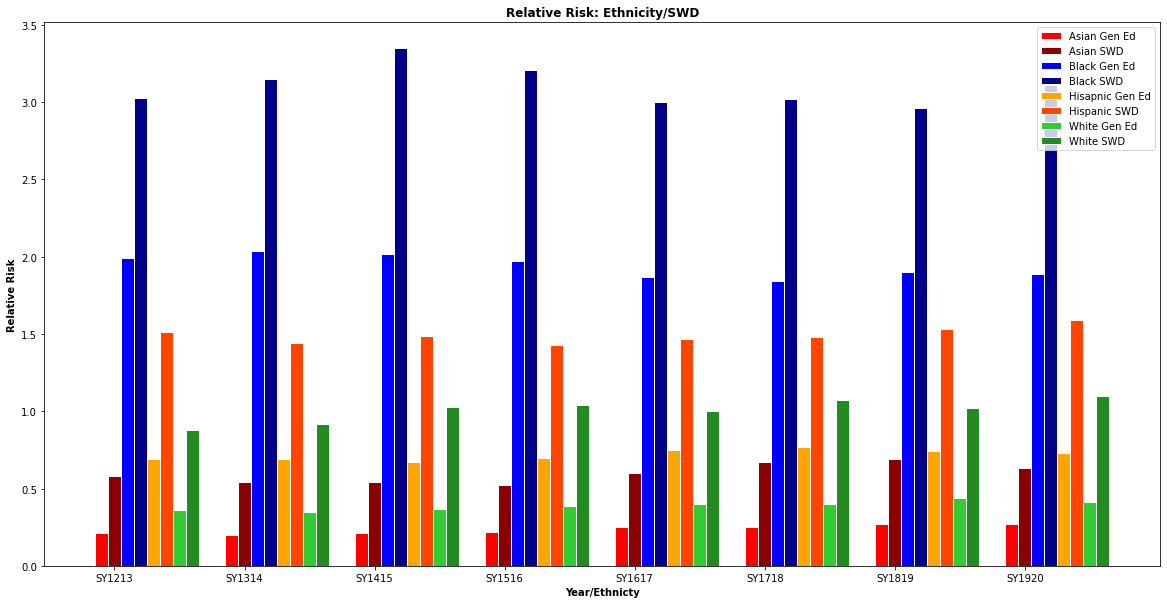

In [317]:
#Source: https://python-graph-gallery.com/11-grouped-barplot/
#Source: https://matplotlib.org/3.1.0/gallery/color/named_colors.html -- COLORS

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
 
# set width of bar
barWidth = 0.1
 
# set height of bar
bars1 = [.21, .20, .21, .22, .25, .25, .27, .27]
bars2 = [.58, .54, .54, .52, .6, .67, .69, .63]
bars3 = [1.99, 2.04, 2.02, 1.97, 1.87, 1.84, 1.9, 1.89]
bars4 = [3.03, 3.15, 3.35, 3.21, 3.0, 3.02, 2.96, 3.11]
bars5 = [.69, .69, .67, .7, .75, .77, .74, .73]
bars6 = [1.51, 1.44, 1.49, 1.43, 1.47, 1.48, 1.53, 1.59]
bars7 = [.36, .35, .37, .39, .4, .4, .44, .41]
bars8 = [.88, .92, 1.03, 1.04, 1.0, 1.07, 1.02, 1.1]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Asian Gen Ed')
plt.bar(r2, bars2, color='darkred', width=barWidth, edgecolor='white', label='Asian SWD')
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='Black Gen Ed')
plt.bar(r4, bars4, color='darkblue', width=barWidth, edgecolor='white', label='Black SWD')
plt.bar(r5, bars5, color='orange', width=barWidth, edgecolor='white', label='Hisapnic Gen Ed')
plt.bar(r6, bars6, color='orangered', width=barWidth, edgecolor='white', label='Hispanic SWD')
plt.bar(r7, bars7, color='limegreen', width=barWidth, edgecolor='white', label='White Gen Ed')
plt.bar(r8, bars8, color='forestgreen', width=barWidth, edgecolor='white', label='White SWD')
 
# Add xticks on the middle of the group bars
plt.xlabel('Year/Ethnicty', fontweight='bold')
plt.ylabel('Relative Risk', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['SY1213', 'SY1314', 'SY1415', 'SY1516', 'SY1617', 'SY1718', 'SY1819', 'SY1920'])
plt.title('Relative Risk: Ethnicity/SWD', fontweight='bold') 
    
# Create legend & Show graphic
plt.legend()
plt.show()

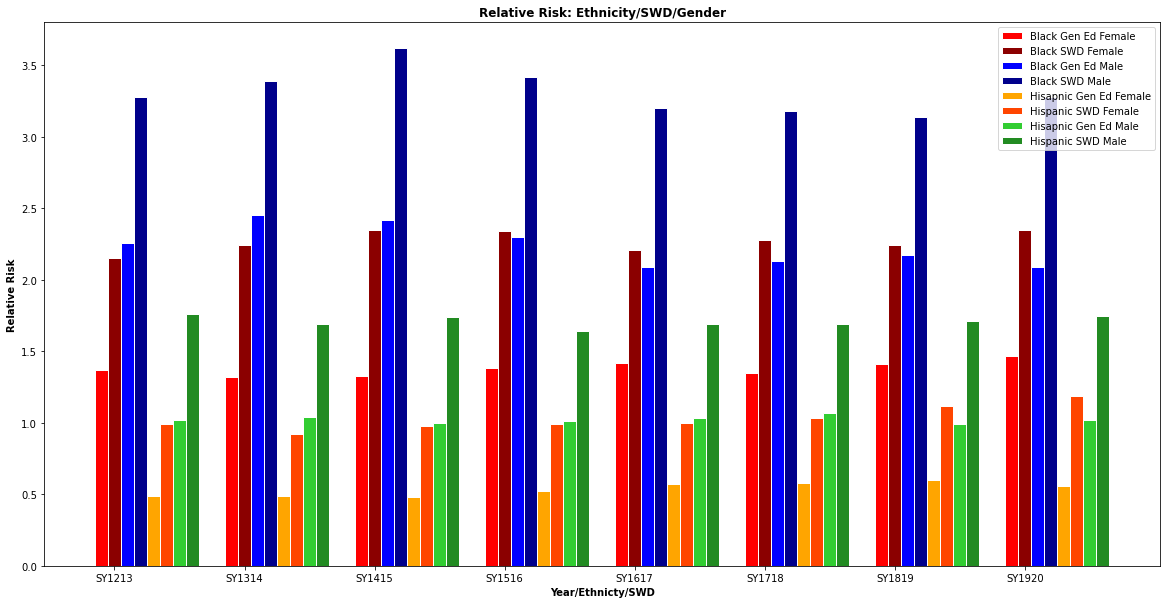

In [327]:
#Source: https://python-graph-gallery.com/11-grouped-barplot/
#Source: https://matplotlib.org/3.1.0/gallery/color/named_colors.html -- COLORS

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
 
# set width of bar
barWidth = 0.1
 
# set height of bar
bars1 = [1.37, 1.32, 1.33, 1.38, 1.42, 1.35, 1.41, 1.47] #Black_N_F
bars2 = [2.15, 2.24, 2.35, 2.34, 2.21, 2.28, 2.24, 2.35] #Black_Y_F
bars3 = [2.26, 2.45, 2.42, 2.3, 2.09, 2.13, 2.17, 2.09] #Black_N_M
bars4 = [3.28, 3.39,3.62, 3.42, 3.2, 3.18, 3.14, 3.28] #Black_Y_M
bars5 = [.49, .49, .48, .52, .57, .58, .6, .56] #Hispanic_N_F
bars6 = [.99, .92, .98, .99, 1.0, 1.03, 1.12, 1.19] #Hispanic_Y_F
bars7 = [1.02, 1.04, 1.0, 1.01, 1.03, 1.07, .99, 1.02] #Hispanic_N_M
bars8 = [1.76, 1.69, 1.74, 1.64, 1.69, 1.69, 1.71, 1.75] #Hispanic_Y_M
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Black Gen Ed Female')
plt.bar(r2, bars2, color='darkred', width=barWidth, edgecolor='white', label='Black SWD Female')
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='Black Gen Ed Male')
plt.bar(r4, bars4, color='darkblue', width=barWidth, edgecolor='white', label='Black SWD Male')
plt.bar(r5, bars5, color='orange', width=barWidth, edgecolor='white', label='Hisapnic Gen Ed Female')
plt.bar(r6, bars6, color='orangered', width=barWidth, edgecolor='white', label='Hispanic SWD Female')
plt.bar(r7, bars7, color='limegreen', width=barWidth, edgecolor='white', label='Hisapnic Gen Ed Male')
plt.bar(r8, bars8, color='forestgreen', width=barWidth, edgecolor='white', label='Hispanic SWD Male')
 
# Add xticks on the middle of the group bars
plt.xlabel('Year/Ethnicty/SWD', fontweight='bold')
plt.ylabel('Relative Risk', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['SY1213', 'SY1314', 'SY1415', 'SY1516', 'SY1617', 'SY1718', 'SY1819', 'SY1920'])
plt.title('Relative Risk: Ethnicity/SWD/Gender', fontweight='bold') 
    
# Create legend & Show graphic
plt.legend()
plt.show()

In [53]:
swd_susp_counts = susp_final.groupby(['AcademicYear', 'SWD']).SWD.count()
swd_susp_counts

AcademicYear  SWD
2012-2013     N      35213
              Y      18252
2013-2014     N      34212
              Y      19292
2014-2015     N      27562
              Y      17064
2015-2016     N      23122
              Y      14525
2016-2017     N      21526
              Y      13708
2017-2018     N      21978
              Y      14690
2018-2019     N      19783
              Y      13018
2019-2020     N      10844
              Y       7371
Name: SWD, dtype: int64

In [54]:
#susp_counts = susp_final.groupby(['AcademicYear', 'SWD']).ethnicity.count()
#susp_totals = susp_final.groupby(['AcademicYear']).ethnicity.count()
swd_susp_percents = (swd_susp_counts/susp_totals) * 100
swd_susp_percents

AcademicYear  SWD
2012-2013     N      65.861779
              Y      34.138221
2013-2014     N      63.942883
              Y      36.057117
2014-2015     N      61.762201
              Y      38.237799
2015-2016     N      61.417908
              Y      38.582092
2016-2017     N      61.094397
              Y      38.905603
2017-2018     N      59.937820
              Y      40.062180
2018-2019     N      60.312186
              Y      39.687814
2019-2020     N      59.533352
              Y      40.466648
dtype: float64

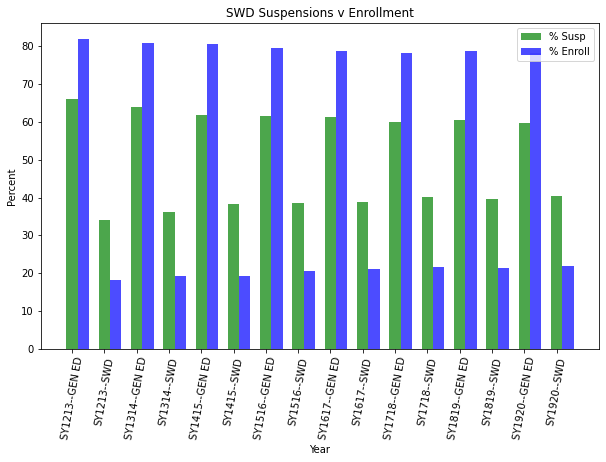

In [175]:
#Source: https://stackoverflow.com/questions/11244514/modify-tick-label-text

plt.figure(figsize=(10, 6))
ind = np.arange(len(swd_susp_percents))  # the x locations for the groups
width = 0.35       # the width of the bars

# plot bars
susp_bars = plt.bar(ind, swd_susp_percents, width, color='g', alpha=.7, label='% Susp')
enroll_bars = plt.bar(ind + width, swd_percents, width, color='b', alpha=.7, label='% Enroll')

# title and labels
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
xticklabels = ['SY1213--GEN ED', 'SY1213--SWD','SY1314--GEN ED', 'SY1314--SWD','SY1415--GEN ED', 'SY1415--SWD', 'SY1516--GEN ED', 'SY1516--SWD','SY1617--GEN ED','SY1617--SWD', 'SY1718--GEN ED', 'SY1718--SWD','SY1819--GEN ED', 'SY1819--SWD','SY1920--GEN ED', 'SY1920--SWD']
plt.ylabel('Percent')
plt.xlabel('Year')
plt.title('SWD Suspensions v Enrollment')
plt.xticks(x, xticklabels, rotation=80)

locations = ind + width / 2  # xtick locations

# legend
plt.legend()


In [132]:
swd_y_susp = susp_final.query('SWD == "Y"')
swd_y_susp_counts = swd_y_susp.groupby(['AcademicYear', 'SWD']).SWD.count()
swd_y_susp_counts

AcademicYear  SWD
2012-2013     Y      18252
2013-2014     Y      19292
2014-2015     Y      17064
2015-2016     Y      14525
2016-2017     Y      13708
2017-2018     Y      14690
2018-2019     Y      13018
2019-2020     Y       7371
Name: SWD, dtype: int64

In [133]:
swd_y_susp_percents = (swd_y_susp_counts/susp_totals)*100
swd_y_susp_percents

AcademicYear  SWD
2012-2013     Y      34.138221
2013-2014     Y      36.057117
2014-2015     Y      38.237799
2015-2016     Y      38.582092
2016-2017     Y      38.905603
2017-2018     Y      40.062180
2018-2019     Y      39.687814
2019-2020     Y      40.466648
dtype: float64

In [134]:
swd_n_susp = susp_final.query('SWD == "N"')
swd_n_susp_counts = swd_n_susp.groupby(['AcademicYear', 'SWD']).SWD.count()
swd_n_susp_counts

AcademicYear  SWD
2012-2013     N      35213
2013-2014     N      34212
2014-2015     N      27562
2015-2016     N      23122
2016-2017     N      21526
2017-2018     N      21978
2018-2019     N      19783
2019-2020     N      10844
Name: SWD, dtype: int64

In [135]:
swd_n_susp_percents = (swd_n_susp_counts/susp_totals)*100
swd_n_susp_percents

AcademicYear  SWD
2012-2013     N      65.861779
2013-2014     N      63.942883
2014-2015     N      61.762201
2015-2016     N      61.417908
2016-2017     N      61.094397
2017-2018     N      59.937820
2018-2019     N      60.312186
2019-2020     N      59.533352
dtype: float64

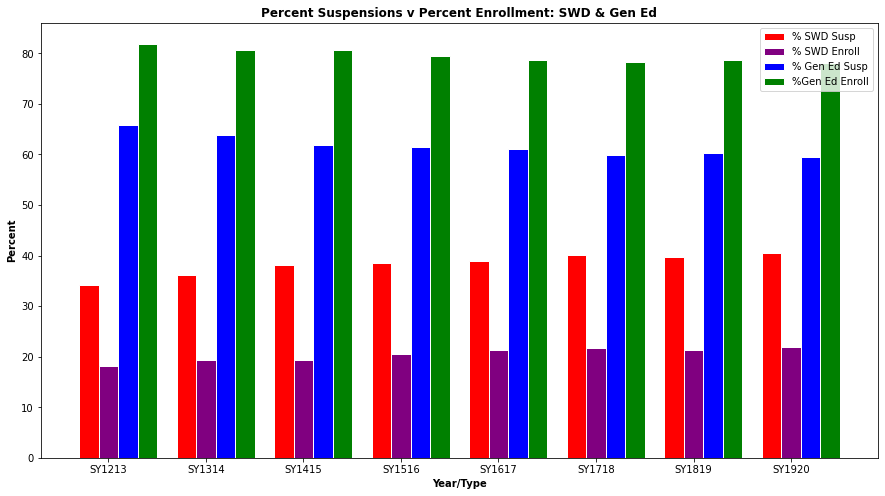

In [323]:
#Source: https://python-graph-gallery.com/11-grouped-barplot/

plt.figure(figsize=(15, 8))

# set width of bar
barWidth = 0.2
 
# set height of bar
bars1 = [34.1, 36.1, 38.2, 38.6, 38.9, 40.1, 39.7, 40.5]
bars2 = [18.1, 19.4, 19.4, 20.5, 21.3, 21.8, 21.4, 21.9]
bars3 = [65.9, 63.9, 61.8, 61.4, 61.1, 59.9, 60.3, 59.5]
bars4 = [81.9, 80.6, 80.6, 79.5, 78.7, 78.2, 78.6, 78.1]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, bars1, color='r', width=barWidth, edgecolor='white', label='% SWD Susp')
plt.bar(r2, bars2, color='purple', width=barWidth, edgecolor='white', label='% SWD Enroll')
plt.bar(r3, bars3, color='b', width=barWidth, edgecolor='white', label='% Gen Ed Susp')
plt.bar(r4, bars4, color='g', width=barWidth, edgecolor='white', label='%Gen Ed Enroll')
 
# Add xticks on the middle of the group bars
plt.xlabel('Year/Type', fontweight='bold')
#plt.xticks(rotation=80)
plt.ylabel('Percent', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['SY1213', 'SY1314', 'SY1415', 'SY1516', 'SY1617', 'SY1718', 'SY1819', 'SY1920'])
plt.title('Percent Suspensions v Percent Enrollment: SWD & Gen Ed', fontweight='bold')

# Create legend & Show graphic
plt.legend()
plt.show()

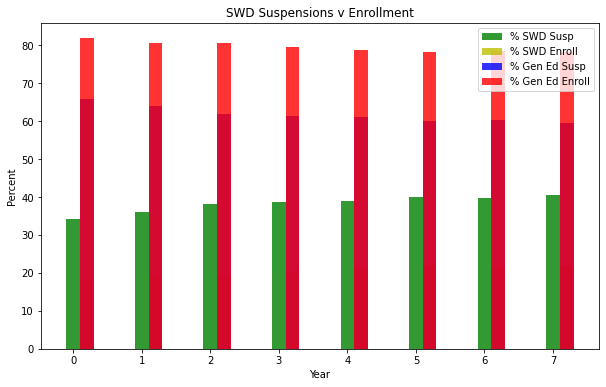

In [330]:
plt.figure(figsize=(10, 6))
ind = np.arange(len(swd_y_percents))
width = 0.2       # the width of the bars

# plot bars
swd_y_susp_bars = plt.bar(ind, swd_y_susp_percents, width, color='g', alpha=.8, label='% SWD Susp')
swd_y_percents_bars = plt.bar(ind + width, swd_y_percents, width, color='y', alpha=.8, label='% SWD Enroll')
swd_n_susp_bars = plt.bar(ind + width, swd_n_susp_percents, width, color='b', alpha=.8, label='% Gen Ed Susp')
swd_n_percents_bars = plt.bar(ind + width, swd_n_percents, width, color='r', alpha=.8, label='% Gen Ed Enroll')

# title and labels
x = [0,1,2,3, 4, 5, 6, 7]
xticklabels = ['SY1213--GEN ED', 'SY1314--GEN ED', 'SY1415--GEN ED', 'SY1516--GEN ED', 'SY1617--GEN ED', 'SY1718--GEN ED', 'SY1819--GEN ED', 'SY1920--GEN ED']
plt.ylabel('Percent')
plt.xlabel('Year')
plt.title('SWD Suspensions v Enrollment')
#plt.xticks(x, xticklabels, rotation=60)

#locations = ind + width / 2 # xtick locations

# legend
plt.legend()

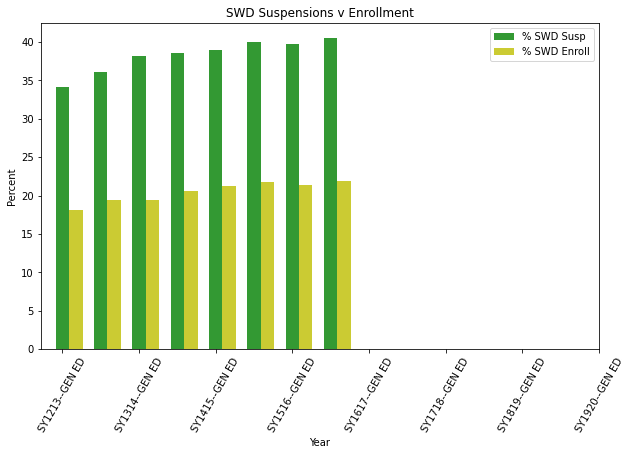

In [157]:
plt.figure(figsize=(10, 6))
ind = np.arange(len(swd_y_percents))  # the x locations for the groups
width = 0.35       # the width of the bars

# plot bars
swd_y_susp_bars = plt.bar(ind, swd_y_susp_percents, width, color='g', alpha=.8, label='% SWD Susp')
swd_y_percents_bars = plt.bar(ind + width, swd_y_percents, width, color='y', alpha=.8, label='% SWD Enroll')


# title and labels
#Zx = [0,2,4,6, 8, 10, 12, 14]
xticklabels = ['SY1213--GEN ED', 'SY1314--GEN ED', 'SY1415--GEN ED', 'SY1516--GEN ED', 'SY1617--GEN ED', 'SY1718--GEN ED', 'SY1819--GEN ED', 'SY1920--GEN ED']
plt.ylabel('Percent')
plt.xlabel('Year')
plt.title('SWD Suspensions v Enrollment')
plt.xticks(x, xticklabels, rotation=60)

locations = ind + width / 2 # xtick locations

# legend
plt.legend()

In [ ]:
plt.figure(figsize=(10, 6))
ind = np.arange(len(swd_y_percents))  # the x locations for the groups
width = 0.35       # the width of the bars

# plot bars

swd_n_susp_bars = plt.bar(ind + width*4, swd_n_susp_percents, width, color='b', alpha=.8, label='% Gen Ed Susp')
swd_n_percents_bars = plt.bar(ind + width*6, swd_n_percents, width, color='r', alpha=.8, label='% Gen Ed Enroll')

# title and labels
#Zx = [0,2,4,6, 8, 10, 12, 14]
xticklabels = ['SY1213--GEN ED', 'SY1314--GEN ED', 'SY1415--GEN ED', 'SY1516--GEN ED', 'SY1617--GEN ED', 'SY1718--GEN ED', 'SY1819--GEN ED', 'SY1920--GEN ED']
plt.ylabel('Percent')
plt.xlabel('Year')
plt.title('SWD Suspensions v Enrollment')
plt.xticks(x, xticklabels, rotation=60)

locations = ind + width / 2 # xtick locations

# legend
plt.legend()

In [ ]:
#########SWD RELATIVE RISK

In [239]:
##NOT WORKING!!!!
#swd_rel_risk = ((swd_susp_pivot2/swd_flg_enroll) / ((susp_totals - swd_susp_pivot2) / (total_enroll - swd_flg_enroll)))
#swd_rel_risk

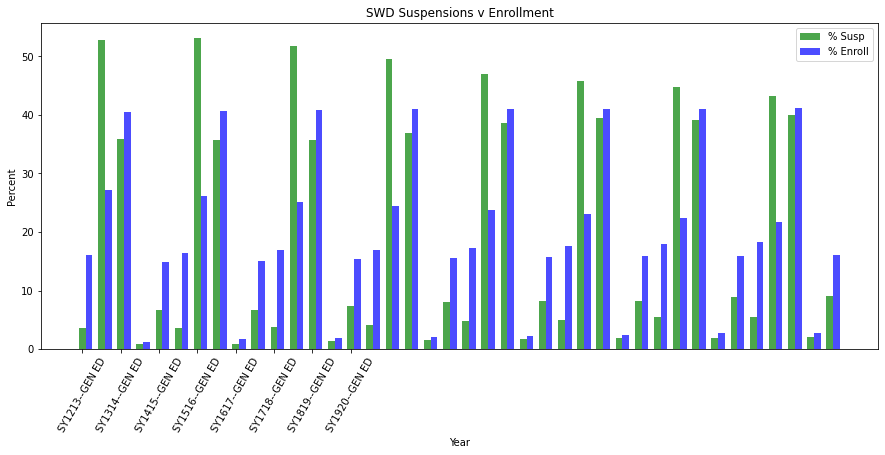

In [124]:
plt.figure(figsize=(15, 6))
ind = np.arange(len(race_susp_percents))  # the x locations for the groups
width = 0.35       # the width of the bars

x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
xticklabels = ['SY1213--GEN ED', 'SY1314--GEN ED', 'SY1415--GEN ED', 'SY1516--GEN ED', 'SY1617--GEN ED', 'SY1718--GEN ED', 'SY1819--GEN ED', 'SY1920--GEN ED']

# plot bars
susp_bars = plt.bar(ind, race_susp_percents, width, color='g', alpha=.7, label='% Susp')
enroll_bars = plt.bar(ind + width, race_percents, width, color='b', alpha=.7, label='% Enroll')

# title and labels
#x = [0,2,4,6, 8, 10, 12, 14]
#xticklabels = ['SY1213--GEN ED', 'SY1314--GEN ED', 'SY1415--GEN ED', 'SY1516--GEN ED', 'SY1617--GEN ED', 'SY1718--GEN ED', 'SY1819--GEN ED', 'SY1920--GEN ED']
plt.ylabel('Percent')
plt.xlabel('Year')
plt.title('Suspensions v Enrollment by Race')
plt.xticks(x, xticklabels, rotation=60)

locations = ind + width / 2  # xtick locations

# legend
plt.legend()

In [210]:
race_asian_susp = susp_final.query('ethnicity == "Asian"')
race_asian_susp_counts = race_asian_susp.groupby(['AcademicYear', 'ethnicity']).ethnicity.count()
race_asian_susp_counts

AcademicYear  ethnicity
2012-2013     Asian        1952
2013-2014     Asian        1923
2014-2015     Asian        1687
2015-2016     Asian        1531
2016-2017     Asian        1676
2017-2018     Asian        1793
2018-2019     Asian        1794
2019-2020     Asian        1007
Name: ethnicity, dtype: int64

In [55]:
race_swd_susp_counts = susp_final.groupby(['AcademicYear', 'ethnicity_SWD']).ethnicity_SWD.count()
race_swd_susp_counts

AcademicYear  ethnicity_SWD
2012-2013     Asian_N           1595
              Asian_Y            357
              Black_N          18846
              Black_Y           9384
              Hispanic_N       12134
                               ...  
2019-2020     Hispanic_Y        3149
              Other_N            242
              Other_Y            130
              White_N           1002
              White_Y            662
Name: ethnicity_SWD, Length: 80, dtype: int64

In [56]:
race_swd_susp_percents = (race_swd_susp_counts/susp_totals) * 100
race_swd_susp_percents

AcademicYear  ethnicity_SWD
2012-2013     Asian_N           2.983260
              Asian_Y           0.667727
              Black_N          35.249228
              Black_Y          17.551669
              Hispanic_N       22.695221
                                 ...    
2019-2020     Hispanic_Y       17.287949
              Other_N           1.328575
              Other_Y           0.713698
              White_N           5.500961
              White_Y           3.634367
Length: 80, dtype: float64

In [57]:
race_swd_Gender_susp_counts = susp_final.groupby(['AcademicYear', 'ethnicity_SWD_Gender']).ethnicity_SWD_Gender.count()
race_swd_Gender_susp_counts

AcademicYear  ethnicity_SWD_Gender
2012-2013     Asian_N_F                298
              Asian_N_M               1297
              Asian_Y_F                 34
              Asian_Y_M                323
              Black_N_F               7621
                                      ... 
2019-2020     Other_Y_M                108
              White_N_F                267
              White_N_M                735
              White_Y_F                 81
              White_Y_M                581
Name: ethnicity_SWD_Gender, Length: 160, dtype: int64

In [58]:
race_swd_Gender_percents = (race_swd_Gender_susp_counts/susp_totals) * 100
race_swd_Gender_percents

AcademicYear  ethnicity_SWD_Gender
2012-2013     Asian_N_F                0.557374
              Asian_N_M                2.425886
              Asian_Y_F                0.063593
              Asian_Y_M                0.604134
              Black_N_F               14.254185
                                        ...    
2019-2020     Other_Y_M                0.592918
              White_N_F                1.465825
              White_N_M                4.035136
              White_Y_F                0.444688
              White_Y_M                3.189679
Length: 160, dtype: float64

In [59]:
race_swd_Gender_grade_cat_susp_counts = susp_final.groupby(['AcademicYear', 'ethnicity_SWD_Gender_grade_cat']).ethnicity_SWD_Gender_grade_cat.count()
race_swd_Gender_grade_cat_susp_counts

AcademicYear  ethnicity_SWD_Gender_grade_cat
2012-2013     Asian_N_F_HS                      111
              Asian_N_F_Other                   187
              Asian_N_M_HS                      387
              Asian_N_M_Other                   910
              Asian_Y_F_HS                        5
                                               ... 
2019-2020     White_N_M_Other                   466
              White_Y_F_HS                       26
              White_Y_F_Other                    55
              White_Y_M_HS                      149
              White_Y_M_Other                   432
Name: ethnicity_SWD_Gender_grade_cat, Length: 320, dtype: int64

In [60]:
race_swd_Gender_grade_cat_percents = (race_swd_Gender_grade_cat_susp_counts/susp_totals) * 100
race_swd_Gender_grade_cat_percents

AcademicYear  ethnicity_SWD_Gender_grade_cat
2012-2013     Asian_N_F_HS                      0.207612
              Asian_N_F_Other                   0.349762
              Asian_N_M_HS                      0.723838
              Asian_N_M_Other                   1.702048
              Asian_Y_F_HS                      0.009352
                                                  ...   
2019-2020     White_N_M_Other                   2.558331
              White_Y_F_HS                      0.142740
              White_Y_F_Other                   0.301949
              White_Y_M_HS                      0.818007
              White_Y_M_Other                   2.371672
Length: 320, dtype: float64

In [241]:
#Pivot susp data to get summary
susp_pivot = pd.DataFrame(susp_final, columns= ['Borough','AcademicYear','ethnicity', 'Gender', 'SWD', 'grade_cat', 'ethnicity_SWD', 'ethnicity_SWD_Gender','ethnicity_SWD_Gender_grade_cat','total', 'Student_ID'])

susp_totals = susp_pivot.pivot_table(index=['Borough'], columns=['AcademicYear'], values=['Student_ID'], aggfunc='nunique', fill_value=0)
print(susp_totals)



             Student_ID                                                    \
AcademicYear  2012-2013 2013-2014 2014-2015 2015-2016 2016-2017 2017-2018   
Borough                                                                     
K                 11246     11122      9216      7998      7379      7613   
M                  5341      5326      4736      4286      3859      3968   
O                     4        14         9        25        29        16   
Q                  8357      7957      7014      6112      5833      6037   
R                  2127      2020      1996      1753      1702      1617   
X                  8764      8709      7324      6407      6486      6853   

                                  
AcademicYear 2018-2019 2019-2020  
Borough                           
K                 7120      4194  
M                 3810      2292  
O                   23        14  
Q                 5284      3215  
R                 1566      1174  
X                 5827    

In [320]:
race_susp_pivot = susp_pivot.pivot_table(index=['Borough'], columns=['AcademicYear','ethnicity'], values=['Student_ID'], aggfunc='nunique', fill_value=0)
print(race_susp_pivot)

             Student_ID                                                      \
AcademicYear  2012-2013                            2013-2014                  
ethnicity         Asian Black Hispanic Other White     Asian Black Hispanic   
Borough                                                                       
K                   362  7679     2368    83   754       376  7543     2354   
M                   163  2415     2470    71   222       129  2446     2455   
O                     0     3        1     0     0         0     9        5   
Q                   873  3762     2964    92   666       832  3516     2815   
R                    48   770      554    24   731        48   733      555   
X                    96  3589     4850    55   174        90  3587     4810   

                          ...                                                 \
AcademicYear              ... 2018-2019                            2019-2020   
ethnicity    Other White  ...     Asian Black His

In [230]:
####REL RISK TABLES

race_susp_pivot2 = susp_pivot.pivot_table(index=['AcademicYear'], columns=['ethnicity'], values=['Student_ID'], aggfunc='nunique', fill_value=0)
print(race_susp_pivot2)

             Student_ID                            
ethnicity         Asian  Black Hispanic Other White
AcademicYear                                       
2012-2013          1541  18183    13193   324  2545
2013-2014          1475  17796    12977   340  2504
2014-2015          1343  14992    11157   388  2358
2015-2016          1225  12683    10017   406  2214
2016-2017          1361  11381     9952   426  2138
2017-2018          1454  11395    10467   471  2278
2018-2019          1444  10129     9389   477  2156
2019-2020           864   6032     5748   290  1294


In [242]:
enroll_pivot = pd.DataFrame(enroll_final, columns= ['borough','year','ethnicity', 'sex', 'swd_flg', 'grade_cat', 'ethnicity_swd_flg', 'ethnicity_swd_flg_sex','ethnicity_swd_flg_sex_grade_cat','total'])


In [233]:
race_enroll_pivot2 = enroll_pivot.pivot_table(index=['year'], columns=['ethnicity'], values=['total'], aggfunc='sum', fill_value=0)
print(race_enroll_pivot2)

            total                                
ethnicity   Asian   Black Hispanic  Other   White
year                                             
2012-2013  150240  254570   378530  12021  139463
2013-2014  150867  241826   375256  15660  138502
2014-2015  154602  229781   374413  16750  141294
2015-2016  156829  225563   378836  19192  144350
2016-2017  158962  220052   379771  20675  145322
2017-2018  161599  211884   377441  22240  145702
2018-2019  167021  208892   382963  25178  149096
2019-2020  166679  197864   377239  25424  147732


In [236]:
swd_susp_pivot2 = susp_pivot.pivot_table(index=['AcademicYear'], columns=['SWD'], values=['Student_ID'], aggfunc='nunique', fill_value=0)
print(swd_susp_pivot2)


             Student_ID       
SWD                   N      Y
AcademicYear                  
2012-2013         24656  11130
2013-2014         23623  11469
2014-2015         19859  10379
2015-2016         17304   9241
2016-2017         16350   8908
2017-2018         16598   9467
2018-2019         15160   8435
2019-2020          8910   5318


In [237]:
swd_enroll_pivot2 = enroll_pivot.pivot_table(index=['year'], columns=['swd_flg'], values=['total'], aggfunc='sum', fill_value=0)
print(swd_enroll_pivot2)


            total        
swd_flg         N       Y
year                     
2012-2013  765097  169727
2013-2014  743211  178900
2014-2015  738699  178141
2015-2016  734782  189988
2016-2017  728105  196677
2017-2018  718452  200414
2018-2019  733181  199969
2019-2020  714950  199988


In [243]:
ethnicity_swd_susp_pivot2 = susp_pivot.pivot_table(index=['AcademicYear'], columns=['ethnicity_SWD'], values=['Student_ID'], aggfunc='nunique', fill_value=0)
print(ethnicity_swd_susp_pivot2)


              Student_ID                                                \
ethnicity_SWD    Asian_N Asian_Y Black_N Black_Y Hispanic_N Hispanic_Y   
AcademicYear                                                             
2012-2013           1298     243   12622    5561       8750       4443   
2013-2014           1230     245   11991    5805       8470       4507   
2014-2015           1125     218    9838    5154       7076       4081   
2015-2016           1025     200    8180    4503       6354       3663   
2016-2017           1133     228    7251    4130       6252       3700   
2017-2018           1175     279    7088    4307       6532       3935   
2018-2019           1174     270    6419    3710       5775       3614   
2019-2020            707     157    3713    2319       3458       2290   

                                               
ethnicity_SWD Other_N Other_Y White_N White_Y  
AcademicYear                                   
2012-2013         225      99    1761    

In [244]:
ethnicity_swd_enroll_pivot2 = enroll_pivot.pivot_table(index=['year'], columns=['ethnicity_swd_flg'], values=['total'], aggfunc='sum', fill_value=0)
print(ethnicity_swd_enroll_pivot2)


                    total                                                \
ethnicity_swd_flg Asian_N Asian_Y Black_N Black_Y Hispanic_N Hispanic_Y   
year                                                                      
2012-2013          139277   10963  201065   53505     298299      80231   
2013-2014          139070   11797  187205   54621     289725      85531   
2014-2015          142343   12259  176842   52939     287626      86787   
2015-2016          143602   13227  170212   55351     285661      93175   
2016-2017          145097   13865  163505   56547     283056      96715   
2017-2018          146912   14687  155304   56580     278831      98610   
2018-2019          151694   15327  153644   55248     284553      98410   
2019-2020          150689   15990  143981   53883     278471      98768   

                                                   
ethnicity_swd_flg Other_N Other_Y White_N White_Y  
year                                               
2012-2013         

In [252]:
ethnicity_swd_Gender_grade_cat_susp_pivot2 = susp_pivot.pivot_table(index=['AcademicYear'], columns=['ethnicity_SWD_Gender_grade_cat'], values=['Student_ID'], aggfunc='nunique', fill_value=0)
print(ethnicity_swd_Gender_grade_cat_susp_pivot2)

                                 Student_ID                               \
ethnicity_SWD_Gender_grade_cat Asian_N_F_HS Asian_N_F_Other Asian_N_M_HS   
AcademicYear                                                               
2012-2013                               101             164          316   
2013-2014                                85             137          332   
2014-2015                                79             118          299   
2015-2016                                72             103          309   
2016-2017                                83             154          271   
2017-2018                                95             162          314   
2018-2019                                88             159          279   
2019-2020                                54             107          180   

                                                                             \
ethnicity_SWD_Gender_grade_cat Asian_N_M_Other Asian_Y_F_HS Asian_Y_F_Other   
Acade

In [253]:
#Export type pivot table to excel
ethnicity_swd_Gender_grade_cat_susp_pivot2.to_excel(r"/Users/holly/Desktop/12172020 data v2.xlsx", sheet_name='enroll',header=True, merge_cells=False)


In [254]:
ethnicity_swd_sex_grade_cat_enroll_pivot2 = enroll_pivot.pivot_table(index=['year'], columns=['ethnicity_swd_flg_sex_grade_cat'], values=['total'], aggfunc='sum', fill_value=0)
print(ethnicity_swd_sex_grade_cat_enroll_pivot2)

                                        total                             \
ethnicity_swd_flg_sex_grade_cat Asian_N_F_3-5 Asian_N_F_HS Asian_N_F_K-2   
year                                                                       
2012-2013                               16010        16435         11198   
2013-2014                               16324        19110         11992   
2014-2015                               16645        21165         11806   
2015-2016                               16932        22451         11235   
2016-2017                               17284        22638         10959   
2017-2018                               16663        19765         10936   
2018-2019                               16861        23547         11811   
2019-2020                               16619        23565         11592   

                                                                            \
ethnicity_swd_flg_sex_grade_cat Asian_N_F_MS Asian_N_F_Other Asian_N_M_3-5   
year   

In [255]:
#Export type pivot table to excel
ethnicity_swd_sex_grade_cat_enroll_pivot2.to_excel(r"/Users/holly/Desktop/12172020 data v3.xlsx", sheet_name='enroll',header=True, merge_cells=False)


In [245]:
ethnicity_swd_gender_susp_pivot2 = susp_pivot.pivot_table(index=['AcademicYear'], columns=['ethnicity_SWD_Gender'], values=['Student_ID'], aggfunc='nunique', fill_value=0)
print(ethnicity_swd_gender_susp_pivot2)

                     Student_ID                                          \
ethnicity_SWD_Gender  Asian_N_F Asian_N_M Asian_Y_F Asian_Y_M Black_N_F   
AcademicYear                                                              
2012-2013                   265      1033        30       213      5365   
2013-2014                   222      1008        39       206      4823   
2014-2015                   197       928        25       193      4033   
2015-2016                   175       850        30       170      3487   
2016-2017                   237       896        32       196      3248   
2017-2018                   257       918        41       238      3074   
2018-2019                   247       927        39       231      2807   
2019-2020                   161       546        20       137      1687   

                                                                              \
ethnicity_SWD_Gender Black_N_M Black_Y_F Black_Y_M Hispanic_N_F Hispanic_N_M   
AcademicYear  

In [247]:
ethnicity_swd_sex_enroll_pivot2 = enroll_pivot.pivot_table(index=['year'], columns=['ethnicity_swd_flg_sex'], values=['total'], aggfunc='sum', fill_value=0)
print(ethnicity_swd_sex_enroll_pivot2)

                          total                                          \
ethnicity_swd_flg_sex Asian_N_F Asian_N_M Asian_Y_F Asian_Y_M Black_N_F   
year                                                                      
2012-2013                 68748     70529      3391      7572    106619   
2013-2014                 68693     70377      3629      8168     99601   
2014-2015                 70457     71886      3767      8492     94771   
2015-2016                 71312     72290      4018      9209     91081   
2016-2017                 72019     73078      4186      9679     87155   
2017-2018                 72878     74034      4378     10309     83025   
2018-2019                 75116     76578      4568     10759     81759   
2019-2020                 74830     75859      4740     11250     76726   

                                                                               \
ethnicity_swd_flg_sex Black_N_M Black_Y_F Black_Y_M Hispanic_N_F Hispanic_N_M   
year        

In [249]:
#Export type pivot table to excel
ethnicity_swd_sex_enroll_pivot2.to_excel(r"/Users/holly/Desktop/12172020 data.xlsx", sheet_name='enroll',header=True, merge_cells=False)


In [235]:
######REL RISK v2 -- NOT WORKING!!!!!
#race_susp_pivot2 + race_enroll_pivot2

#race_rel_risk = ((race_susp_pivot2/race_enroll_pivot2) / ((susp_totals - race_susp_pivot2) / (total_enroll - race_enroll_pivot2)))
#race_rel_risk

In [321]:
swd_susp_pivot = susp_pivot.pivot_table(index=['Borough'], columns=['AcademicYear','SWD'], values=['Student_ID'], aggfunc='nunique', fill_value=0)
print(swd_susp_pivot)

             Student_ID                                                     \
AcademicYear  2012-2013          2013-2014       2014-2015       2015-2016   
SWD                   N     Y  y         N     Y         N     Y         N   
Borough                                                                      
K                  7918  3326  2      7694  3428      6216  3000      5293   
M                  3601  1740  0      3524  1802      3120  1616      2832   
O                     0     4  0         7     7         0     9         1   
Q                  6015  2342  0      5549  2408      4801  2213      4151   
R                  1258   869  0      1134   886      1095   901       975   
X                  5893  2871  0      5744  2965      4656  2668      4070   

                                                                              \
AcademicYear       2016-2017       2017-2018       2018-2019       2019-2020   
SWD              Y         N     Y         N     Y         

In [322]:
race_swd_susp_pivot = susp_pivot.pivot_table(index=['Borough'], columns=['AcademicYear','ethnicity', 'SWD'], values=['Student_ID'], aggfunc='nunique', fill_value=0)
print(race_swd_susp_pivot)

             Student_ID                                                     \
AcademicYear  2012-2013                                                      
ethnicity         Asian      Black       Hispanic          Other     White   
SWD                   N    Y     N     Y        N     Y  y     N   Y     N   
Borough                                                                      
K                   308   54  5454  2225     1541   825  2    57  26   558   
M                   151   12  1617   798     1615   855  0    46  25   172   
O                     0    0     0     3        0     1  0     0   0     0   
Q                   732  141  2654  1108     2080   884  0    71  21   478   
R                    35   13   454   316      327   227  0    15   9   427   
X                    72   24  2462  1127     3195  1655  0    37  18   127   

              ...                                                              
AcademicYear  ... 2019-2020                                  

In [323]:
race_swd_gender_susp_pivot = susp_pivot.pivot_table(index=['Borough'], columns=['AcademicYear','ethnicity', 'SWD', 'Gender'], values=['Student_ID'], aggfunc='nunique', fill_value=0)
print(race_swd_gender_susp_pivot)

             Student_ID                                                      \
AcademicYear  2012-2013                                                       
ethnicity         Asian               Black                  Hispanic         
SWD                   N        Y          N          Y              N         
Gender                F    M   F    M     F     M    F     M        F     M   
Borough                                                                       
K                    44  264   6   48  2307  3147  556  1669      561   980   
M                    36  115   0   12   751   866  211   587      641   974   
O                     0    0   0    0     0     0    1     2        0     0   
Q                   156  576  20  121  1056  1598  286   822      695  1385   
R                    12   23   2   11   170   284   82   234      115   212   
X                    17   55   2   22  1087  1375  278   849     1230  1965   

              ...                                  

In [336]:
race_enroll_percents.to_excel(r'/Users/holly/Desktop/nycdoe/12152020 race_enroll_percents.xlsx', sheet_name='test',header=True, merge_cells=False)
race_susp_percents.to_excel(r'/Users/holly/Desktop/nycdoe/12152020 race_susp_percents.xlsx', sheet_name='test',header=True, merge_cells=False)
swd_enroll_percents.to_excel(r'/Users/holly/Desktop/nycdoe/12152020 swd_enroll_percents.xlsx', sheet_name='test',header=True, merge_cells=False)
swd_susp_percents.to_excel(r'/Users/holly/Desktop/nycdoe/12152020 swd_susp_percents.xlsx', sheet_name='test',header=True, merge_cells=False)
race_swd_enroll_percents.to_excel(r'/Users/holly/Desktop/nycdoe/12152020 race_swd_enroll_percents.xlsx', sheet_name='test',header=True, merge_cells=False)
race_swd_susp_percents.to_excel(r'/Users/holly/Desktop/nycdoe/12152020 race_swd_susp_percents.xlsx', sheet_name='test',header=True, merge_cells=False)
enroll_total.to_excel(r'/Users/holly/Desktop/nycdoe/12152020 enroll_total.xlsx', sheet_name='test',header=True, merge_cells=False)
susp_totals.to_excel(r'/Users/holly/Desktop/nycdoe/12152020 susp_totals.xlsx', sheet_name='test',header=True, merge_cells=False)
race_enroll_pivot.to_excel(r'/Users/holly/Desktop/nycdoe/12152020 race_enroll_pivot.xlsx', sheet_name='test',header=True, merge_cells=False)
race_susp_pivot.to_excel(r'/Users/holly/Desktop/nycdoe/12152020 race_susp_pivot.xlsx', sheet_name='test',header=True, merge_cells=False)
swd_enroll_pivot.to_excel(r'/Users/holly/Desktop/nycdoe/12152020 swd_enroll_pivot.xlsx', sheet_name='test',header=True, merge_cells=False)
swd_susp_pivot.to_excel(r'/Users/holly/Desktop/nycdoe/12152020 swd_susp_pivot.xlsx', sheet_name='test',header=True, merge_cells=False)
race_swd_enroll_pivot.to_excel(r'/Users/holly/Desktop/nycdoe/12152020 race_swd_enroll_pivot.xlsx', sheet_name='test',header=True, merge_cells=False)
race_swd_susp_pivot.to_excel(r'/Users/holly/Desktop/nycdoe/12152020 race_swd_susp_pivot.xlsx', sheet_name='test',header=True, merge_cells=False)
race_swd_gender_enroll_pivot.to_excel(r'/Users/holly/Desktop/nycdoe/12152020 race_swd_gender_enroll_pivot.xlsx', sheet_name='test',header=True, merge_cells=False)
race_swd_gender_susp_pivot.to_excel(r'/Users/holly/Desktop/nycdoe/12152020 race_swd_gender_susp_pivot.xlsx', sheet_name='test',header=True, merge_cells=False)


In [334]:
#Source: https://stackoverflow.com/questions/35707723/writing-multiple-pandas-dataframes-to-multiple-excel-worksheets
#initialze the excel writer
#writer = pd.ExcelWriter('/Users/holly/Desktop/nycdoe/12152020 SUSP Dispro Data Outputv2.xlsx', engine='xlsxwriter')

#df1 = pd.DataFrame({'race_enroll_percents'})
#df2 = pd.DataFrame({'race_susp_percents'})
#df3 = pd.DataFrame({'swd_enroll_percents'})
#df4 = pd.DataFrame({'swd_susp_percents'})
#df5 = pd.DataFrame({'race_swd_enroll_percents'})
#df6 = pd.DataFrame({'race_swd_susp_percents'})
#df7 = pd.DataFrame({'enroll_total'}) 
#df8 = pd.DataFrame({'susp_totals'}) 
#df9 = pd.DataFrame({'race_enroll_pivot'})
#df10 = pd.DataFrame({'race_susp_pivot'})
#df11 = pd.DataFrame({'swd_enroll_pivot'})
#df12 = pd.DataFrame({'swd_susp_pivot'})
#df13 = pd.DataFrame({'race_swd_enroll_pivot'})
#df14 = pd.DataFrame({'race_swd_susp_pivot'}) 
#df15 = pd.DataFrame({'race_swd_gender_enroll_pivot'})
#df16 = pd.DataFrame({'race_swd_gender_susp_pivot'})


#race_enroll_percents.to_excel(writer, sheet_name='race_enroll')
#race_susp_percents.to_excel(writer, sheet_name='race_susp')
#swd_enroll_percents.to_excel(writer, sheet_name='swd_enroll')
#swd_susp_percents.to_excel(writer, sheet_name='swd_susp')
#race_swd_enroll_percents.to_excel(writer, sheet_name='race_swd_enroll')
#race_swd_susp_percents.to_excel(writer, sheet_name='race_swd_susp')
#enroll_total.to_excel(writer, sheet_name='enroll_total')
#susp_totals.to_excel(writer, sheet_name='susp_totals')
#race_enroll_pivot.to_excel(writer, sheet_name='race_enroll')
#race_susp_pivot.to_excel(writer, sheet_name='race_susp')
#swd_enroll_pivot.to_excel(writer, sheet_name='swd_enroll')
#swd_susp_pivot.to_excel(writer, sheet_name='swd_susp')
#race_swd_enroll_pivot.to_excel(writer, sheet_name='race_swd_enroll')
#race_swd_susp_pivot.to_excel(writer, sheet_name='race_swd_susp')
#race_swd_gender_enroll_pivot.to_excel(writer, sheet_name='race_swd_gender_enroll')
#race_swd_gender_susp_pivot.to_excel(writer, sheet_name='race_swd_gender_susp')

#now loop thru and put each on a specific sheet
#for sheet, frame in  frames.iteritems(): # .use .items for python 3.X
#    frame.to_excel(writer, sheet_name = sheet)

#critical last step
#writer.save()